# Biodiversity in U.S. National Parks

## North American Birds of Prey

<img src="Images/Bald Eagle.jpg"/>
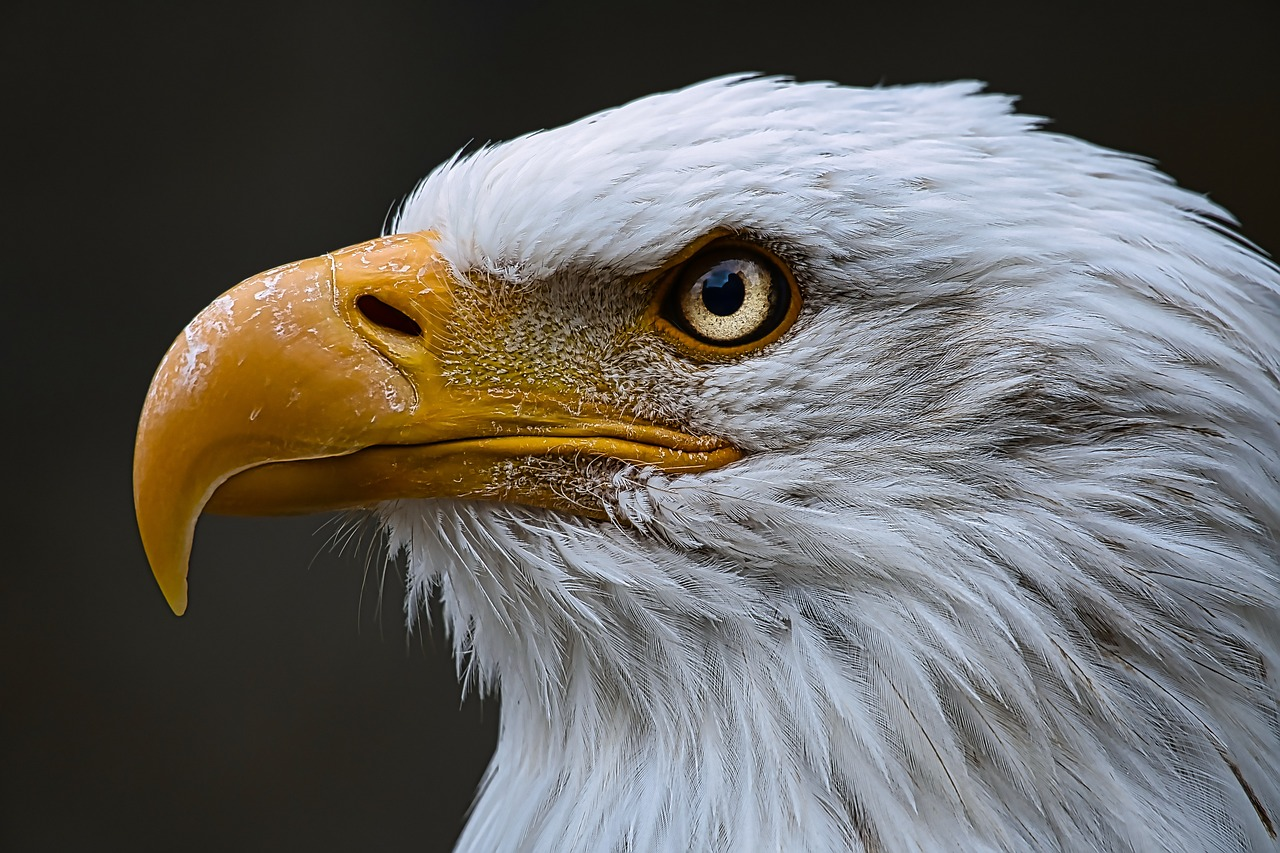

#### The [Bald Eagle](https://pixabay.com/photos/bald-eagle-bird-raptor-bird-of-prey-6481346/) is the national bird of the United States of America and was once a critically endangered species.

Importing the necessary modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns

## Loading in the data

There are two .csv files to inspect

----

## Observations

The `observations.csv` contains data about different species and their conservation status

- `scientific_name` - the scientific name of each species
- `park_name` - National Park where species were found
- `observations` - the number of times each species was observed at park in the past 7 days


In [2]:
obs_data = pd.read_csv("observations.csv")
print(f"Columns: {obs_data.columns.tolist()}\n")

Columns: ['scientific_name', 'park_name', 'observations']



In [3]:
print(f"(Rows, Columns): {obs_data.shape}\n")
obs_data.head()

(Rows, Columns): (23296, 3)



,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
sci_name = obs_data.scientific_name.unique()
sci_name_list = sci_name.tolist()

print(f"We have {len(sci_name_list)} unique species\n")

print(f'National Parks: \n{obs_data.park_name.unique()}')

We have 5541 unique species

National Parks: 
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


<img src="Images/National Park Map.png"/>

### From [Google Earth](https://earth.google.com/web/@39.00737915,-95.31864374,-81.61621475a,5326276.02988026d,35y,0h,0t,0r) we have the following National Parks all situated in the continental United States;

- #### Bryce Canyon in Utah
- #### Great Smoky Mountains in North Carolina & Tennessee
- #### Yellowstone in Idaho, Montana & Wyoming
- #### Yosemite in California

### The National Parks represent an extremely diverse landscape.

<img src="Images/Park Landscapes.jpg"/>

[Pixabay](https://pixabay.com)

#### From top left circling anticlockwise, we have;

[Yosemite](https://www.nps.gov/yose/index.htm),
[Bryce Canyon](https://www.nps.gov/brca/index.htm),
[Great Smoky Mountains](https://www.nps.gov/grsm/index.htm),
[Yellowstone](https://www.nps.gov/yell/index.htm)

I will assume `Bryce National Park` refers to 'Bryce Canyon', UT

In [5]:
obs_data['park_name'].replace({'Great Smoky Mountains National Park':'Great Smoky Mountains',
                                                  'Bryce National Park':'Bryce Canyon',
                                                  'Yosemite National Park':'Yosemite',
                                                  'Yellowstone National Park':'Yellowstone',
                                                  },inplace=True)
parks_list = obs_data.park_name.unique().tolist()
print(f"National Parks: \n{parks_list}\n")

National Parks: 
['Great Smoky Mountains', 'Yosemite', 'Bryce Canyon', 'Yellowstone']



----
&nbsp;
### Distribution of observation data

In [6]:
print(f"Observation statistics: \n\n{obs_data.observations.describe()}\n")

Observation statistics: 

count    23296.000000
mean       142.287904
std         69.890532
min          9.000000
25%         86.000000
50%        124.000000
75%        195.000000
max        321.000000
Name: observations, dtype: float64



#### Total `observations` are evenly divided by `park_name`.

In [7]:
obs_data.park_name.value_counts()

Great Smoky Mountains    5824
Yosemite                 5824
Bryce Canyon             5824
Yellowstone              5824
Name: park_name, dtype: int64

#### We plot a histogram of the spread for each of the parks

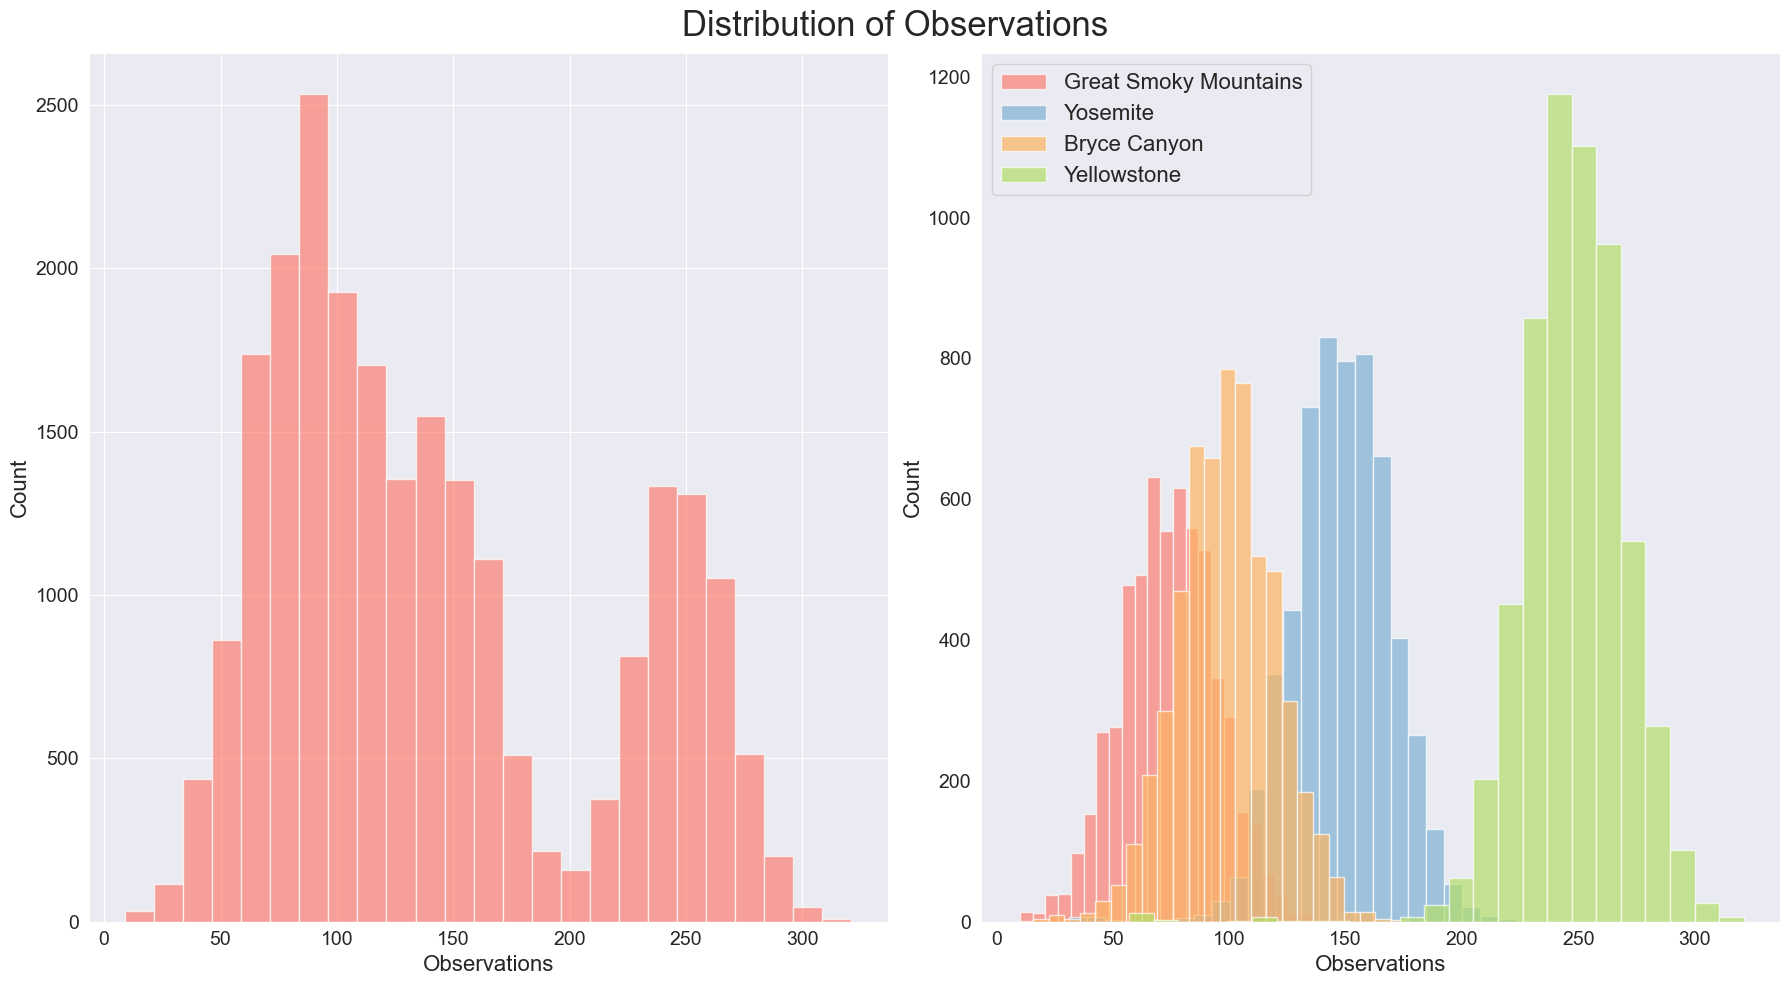

In [8]:
colours = ['#fb8072','#80b1d3','#fdb462','#b3de69']
plt.figure(figsize = (18,10))

plt.subplot(1,2,1)
plt.hist(x = obs_data.observations,
         bins = 25, color=colours[0], alpha=0.7)
plt.xlabel('Observations', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Count', fontsize = 16)
plt.yticks(fontsize = 14)

plt.subplot(1,2,2)
for i, park in enumerate(parks_list):
    hist_df = obs_data[obs_data.park_name == park]
    plt.hist(x = hist_df.observations,
            bins = 25, label = park, alpha=0.7, color=colours[i])
plt.xlabel('Observations', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Count', fontsize = 16)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 16)
plt.grid(False)

plt.suptitle("Distribution of Observations", fontsize = 25)
plt.tight_layout()
plt.show()

#### The graph on the left is shows a bimodal distribution of observations.
#### when divided by National Park, observations appear normally distributed.
&nbsp;
The summary statistics show no outliers at the extremes


In [9]:
print(f"Total number of observations: {obs_data.observations.sum()}")

Total number of observations: 3314739




### Across the four parks there were over 3 Million individual sightings over a seven-day period.



----

## Species

The `species_info.csv` contains information on the different species in the National Parks along with their conservation status.

- `category` - class of animal
- `scientific_name` - the scientific name of each species
- `common_name` - the common names of each species
- `conservation_status` - each species’ current conservation status


In [10]:
species_data = pd.read_csv("species_info.csv")
print(f"Columns: {species_data.columns.tolist()}")

Columns: ['category', 'scientific_name', 'common_names', 'conservation_status']


In [11]:
species_data.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


We need to see if the number of unique values correlates with the other dataframe along with how many `conservation_status` we have 'NaN' which we'll assume for now means 'not endangered'.

In [12]:
print(f"Shape of the data (Rows, Columns): {species_data.shape}\n")
print(f"Type of data:\n\n{species_data.dtypes}\n")
print(f"The number of unique values:\n\n{species_data.nunique()}")

Shape of the data (Rows, Columns): (5824, 4)

Type of data:

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

The number of unique values:

category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64


In [13]:
sci_name_list_2 = species_data.scientific_name.unique()
print(f"Unique Species (Scientific Name): {len(sci_name_list_2)}\n")

com_name_list = species_data.common_names.unique()
print(f"Unique Species (Common Name): {len(com_name_list)}")

Unique Species (Scientific Name): 5541

Unique Species (Common Name): 5504


#### I would expect the `scientific_name`/`common_names` to be the same length.
Perhaps some species $\notin$ `common_names` or we have repeated values.
`sci_name_list` from `obs_data.csv` and `sci_name_list_2` from `species_data.csv` are the same length.

#### There are 5824 rows of observation data for each `park_name`.
#### Some species have been observed more than once

----
&nbsp;
## Analysing `species_data` under `common_name` for duplicates.

In [14]:
duplicates = species_data[species_data.common_names.duplicated()]['common_names'].tolist()
print(f'We have {len(duplicates)} duplicated common names')

We have 320 duplicated common names


We are centering our analysis on `Birds`
Therefore, we will find duplicates under `common_names` with `category` $=$ `Bird`

In [15]:
duplicated_birds = species_data[(species_data.common_names.duplicated()) & (species_data.category == 'Bird')]['common_names'].tolist()
print(f"We have {len(duplicated_birds)} duplicated common names of Birds\n")

We have 40 duplicated common names of Birds



We next find duplicated common names of the form; `Wolf, Grey Wolf`

In [16]:
# Split the common name at the comma
species_data_split = species_data.assign(common_names = species_data.common_names.str.split(',')).explode('common_names')

# Populate a list
duplicated_birds_two = species_data_split[species_data_split.common_names.duplicated() & (species_data_split.category == 'Bird')]['common_names'].tolist()
print(f"We have {len(duplicated_birds_two)} bird species with repeated names\n")

We have 55 bird species with repeated names



`duplicated_birds_two` contains bird species with repeated, comma seperated `common_names` such as `Water Pipit, Water Pipit`
We write a simple iteration to populate a list with the difference of `duplicated_birds`

In [17]:
repeated_different_birds_list = []

for bird in duplicated_birds_two:
  if bird not in duplicated_birds:
    repeated_different_birds_list.append(bird)

### 15 bird species have multiple `common_names`

In [18]:
print(f"{len(repeated_different_birds_list)} birds have more than one unique name\n")
print(repeated_different_birds_list)

15 birds have more than one unique name

['Osprey', 'Brant', 'Chukar', 'Common Loon', 'Fox Sparrow', 'Common Redpoll', 'Bank Swallow', 'Gray Catbird', 'Blue-Gray Gnatcatcher', 'Blue-Headed Vireo', 'Eurasian Collared Dove', 'Black-Billed Magpie', 'Gray Flycatcher', 'Great Gray Owl', 'Barn Owl']


----
&nbsp;
## We have duplicates with more than one, comma seperated, unique `common_name`.
- This is important to consider when we merge the DataFrames.

We can explore an example using regex with the first element in the `repeated_different_birds_list`

In [19]:
species_data['is_osprey'] = species_data.common_names.str.contains(r"\bOsprey\b", regex=True)
species_data[species_data.is_osprey]

,category,scientific_name,common_names,conservation_status,is_osprey
104,Bird,Pandion haliaetus,Osprey,Species of Concern,True
3081,Bird,Pandion haliaetus,"Osprey, Western Osprey",Species of Concern,True


Both `Osprey` and `Osprey, Western Osprey` have exactly the same `scientific_name`. The two entries do refer to the [same](https://en.wikipedia.org/wiki/Osprey) bird.
We shall explore `species_data` further before deciding what to do with these entries.

----
&nbsp;
## Exploring the `category` column

In [20]:
category_list = species_data.category.unique()
print(f"{len(category_list)} Categories:\n\n{category_list}\n")
print(f"\nEach of size")
species_data.groupby('category').size()

7 Categories:

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Each of size


category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

----
&nbsp;
## Exploring the `conservation_status` column

In [21]:
print(f"There are {species_data.conservation_status.nunique()} categories:\n\n{species_data.conservation_status.unique()}")

There are 4 categories:

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [22]:
print(f"NaN value count: {species_data.conservation_status.isna().sum()}\n")
species_data.groupby("conservation_status").size()

NaN value count: 5633



conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

### There are 16 endangered species in `species_data`

----

# Analysis



### The column `conservation_status` has values;
&nbsp;
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range


### I will change the `NaN` value to 'Least Concern' as per the [International Union for Conservation of Nature](https://en.wikipedia.org/wiki/IUCN_Red_List) classification system

In [23]:
species_data.fillna('Least Concern', inplace=True)
species_data.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
Least Concern         5633
Species of Concern     161
Threatened              10
dtype: int64

In [24]:
conservation_cat = species_data[species_data.conservation_status != 'Least Concern']\
    .groupby(['conservation_status', 'category'])['scientific_name']\
    .count()\
    .unstack()
print(f"Categories not equal to Least Concern:\n")
conservation_cat

Categories not equal to Least Concern:



category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


### Birds have the greatest number of `Species of Concern`
### Mammals have the greatest number of `Endangered` species

----
&nbsp;
## We will now visualise the distribution of `conservation_status` across `category`

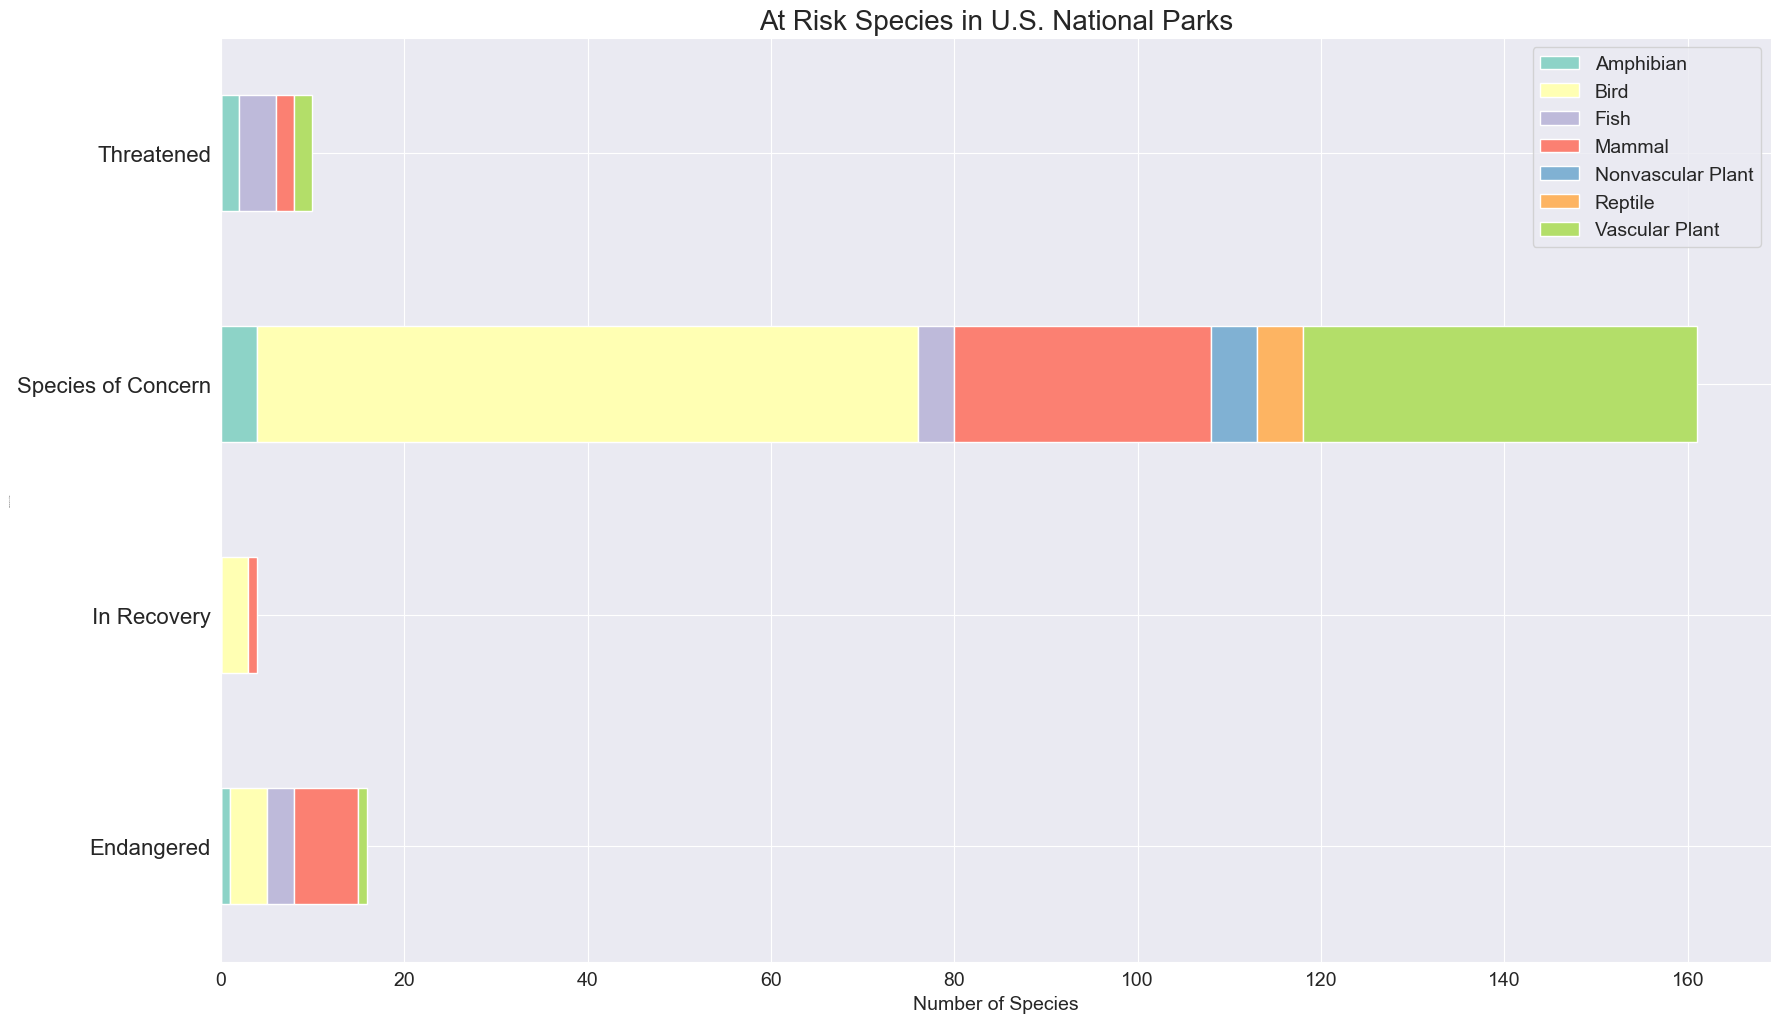

<Figure size 640x480 with 0 Axes>

In [25]:
colours = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd']
cons_status_list = ['Endangered', 'In Recovery', 'Species of Concern', 'Threatened']
ax = conservation_cat.plot(kind='barh', figsize=(20,12),
                           stacked=True, color=colours)
ax.set_ylabel("Conservation Status", fontsize=0)
ax.set_xlabel("Number of Species", fontsize=14)
ax.set_yticks(range(len(cons_status_list)), fontsize=16)
ax.set_yticklabels(cons_status_list, fontsize=16)
plt.xticks(fontsize=14)
plt.title("At Risk Species in U.S. National Parks", fontsize=20)
plt.legend(fontsize=14)
plt.show()
plt.clf()

### We remove the 'Species of Concern' category to zoom in on the other statuses

In [26]:
conservation_cat_two = species_data[(species_data.conservation_status != 'Least Concern')
                    & (species_data.conservation_status != 'Species of Concern')]\
    .groupby(['conservation_status', 'category'])['scientific_name']\
    .count()\
    .unstack()
cons_status_list_two = ['Endangered', 'In Recovery', 'Threatened']

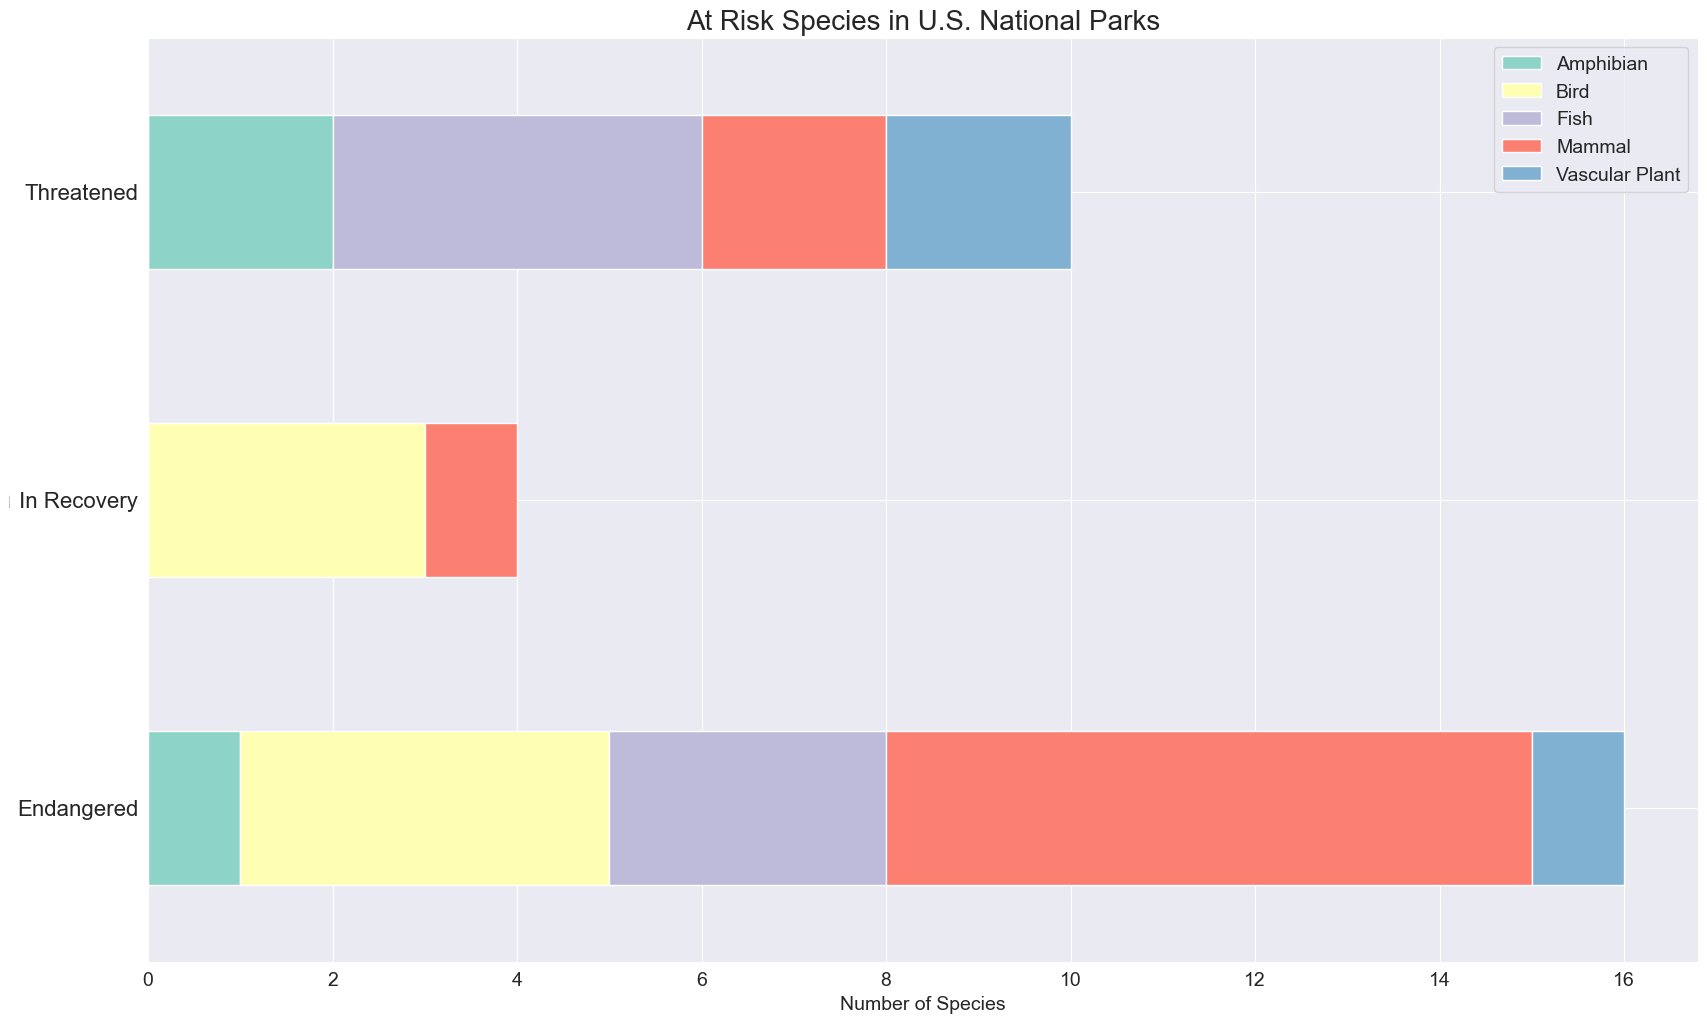

<Figure size 640x480 with 0 Axes>

In [27]:
ax = conservation_cat_two.plot(kind='barh', figsize=(20,12),
                           stacked=True, color=colours)
ax.set_ylabel("Conservation status", fontsize=0)
ax.set_xlabel("Number of Species", fontsize=14)
ax.set_yticks(range(len(cons_status_list_two)))
ax.set_yticklabels(cons_status_list_two, fontsize=16)
plt.xticks(fontsize=14)
plt.title("At Risk Species in U.S. National Parks", fontsize=20)
plt.legend(fontsize=14)
plt.show()
plt.clf()

From the above graphs, it seems that `Birds` are most at risk across the board in U.S. National Parks.

Is this true? Are certain `categories` of species more likely to be endangered?

We will create a new column, `is_protected` to include any species with a value other than `Least Concern`.

In [28]:
species_data['is_protected'] = species_data.conservation_status != 'Least Concern'

In [29]:
category_counts = species_data.groupby(['category', 'is_protected'])\
                            .scientific_name.nunique()\
                            .reset_index()\
                            .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                            .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


`percent_protected` will show the rate of protected species for each `category`

In [30]:
percentage = round(category_counts.protected / (category_counts.protected + category_counts.not_protected) * 100, 2)

category_counts['percent_protected'] = percentage
category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,11,8.73
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


## Mammals have a slightly greater proportion of protected species than birds.

----
&nbsp;
# Species Exploration

#### We're interested in exploring apex predators. They are normally one of the best indicators of biodiversity


Below are explorations into a few `Mammal` apex predators using regex.
The range of names in the `common_names` column is interesting to note and will be useful for further analysis at a later date.

----
&nbsp;
## Wolves

We first explore the genus [Canis](https://en.wikipedia.org/wiki/Canis) which includes;
wolves, dogs, coyotes and jackals.

In [31]:
species_data['is_canis'] = species_data.scientific_name.str.contains(r"\bCanis\b", regex=True)
species_data[species_data.is_canis]

,category,scientific_name,common_names,conservation_status,is_osprey,is_protected,is_canis
7,Mammal,Canis latrans,Coyote,Species of Concern,False,True,True
8,Mammal,Canis lupus,Gray Wolf,Endangered,False,True,True
9,Mammal,Canis rufus,Red Wolf,Endangered,False,True,True
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery,False,True,True
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered,False,True,True


In [32]:
species_data['is_wolf'] = species_data.common_names.str.contains(r"\bWolf\b", regex=True)
species_data[species_data.is_wolf]

,category,scientific_name,common_names,conservation_status,is_osprey,is_protected,is_canis,is_wolf
8,Mammal,Canis lupus,Gray Wolf,Endangered,False,True,True,True
9,Mammal,Canis rufus,Red Wolf,Endangered,False,True,True,True
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery,False,True,True,True
3993,Vascular Plant,Euphorbia esula,"Leafy Spurge, Spurge, Wolf's Milk, Wolf's-Milk",Least Concern,False,False,False,True
4020,Vascular Plant,Salix wolfii var. idahoensis,Wolf's Willow,Least Concern,False,False,False,True
4288,Vascular Plant,Trisetum wolfii,"Wolf Trisetum, Wolf's Trisetum",Least Concern,False,False,False,True
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered,False,True,True,True


We have picked up wolf species under regex searching for `Canis` or `Wolf`.

However, some `common_names` take multiple values.
Is the `Gray Wolf` `Endangered` or `In Recovery`?

----

## Big Cats

Next we explore any hits under `common_name` 'Cat' or 'Lion'

In [33]:
species_data['cat'] = species_data.common_names.str.contains(r"\bCat\b", regex=True)
species_data[species_data.cat]

,category,scientific_name,common_names,conservation_status,is_osprey,is_protected,is_canis,is_wolf,cat
14,Mammal,Felis silvestris,"Wild Cat, Wildcat",Least Concern,False,False,False,False,True
858,Vascular Plant,Hypochaeris radicata,"Cat's Ear, Spotted Cat's-Ear",Least Concern,False,False,False,False,True
3577,Vascular Plant,Cryptantha torreyana,"Torrey's Cat's-Eye, Torrey's Cryptantha",Least Concern,False,False,False,False,True
4062,Vascular Plant,Picea glauca,"Black Hills Spruce, Canadian Spruce, Cat Spruc...",Least Concern,False,False,False,False,True
4798,Vascular Plant,Hypochaeris glabra,"Smooth Cat's Ear, Smooth Catsear",Least Concern,False,False,False,False,True
4799,Vascular Plant,Hypochaeris radicata,"Common Cat's-Ear, False Dandelion, Frogbit, Go...",Least Concern,False,False,False,False,True


We found one cat and five plants.

In [34]:
species_data['lion'] = species_data.common_names.str.contains(r"\bLion\b", regex=True)
species_data[species_data.lion]

,category,scientific_name,common_names,conservation_status,is_osprey,is_protected,is_canis,is_wolf,cat,lion
13,Mammal,Felis concolor,Mountain Lion,Least Concern,False,False,False,False,False,True
16,Mammal,Puma concolor,Panther (Mountain Lion),Least Concern,False,False,False,False,False,True
897,Vascular Plant,Prenanthes serpentaria,"Lion's-Foot, Rattlesnakeroot",Least Concern,False,False,False,False,False,True
898,Vascular Plant,Prenanthes trifoliolata,"Lion's Foot, Three-Leaved Rattlesnake-Root",Least Concern,False,False,False,False,False,True
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",Least Concern,False,False,False,False,False,True
4451,Mammal,Puma concolor,Mountain Lion,Least Concern,False,False,False,False,False,True


`Puma concolor` has been referred to as "Panther, Cougar, Mountain Lion, Puma"
`Felis concolor` has also been referred to as a "Mountain Lion"

Mountain lions are not protected.

We will search for more hits under the genus [Felis](https://en.wikipedia.org/wiki/Felis)

In [35]:
species_data['is_felis'] = species_data.scientific_name.str.contains(r"\bFelis\b", regex=True)
species_data[species_data.is_felis]

,category,scientific_name,common_names,conservation_status,is_osprey,is_protected,is_canis,is_wolf,cat,lion,is_felis
13,Mammal,Felis concolor,Mountain Lion,Least Concern,False,False,False,False,False,True,True
14,Mammal,Felis silvestris,"Wild Cat, Wildcat",Least Concern,False,False,False,False,True,False,True


----
&nbsp;
# Milestone
&nbsp;
## Protected mammals will be reevaluated once an efficient sorting algorithm has been written.

----

We remove the newly created columns to reuse the `species_data` DataFrame.

In [36]:
species_data.head()

,category,scientific_name,common_names,conservation_status,is_osprey,is_protected,is_canis,is_wolf,cat,lion,is_felis
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern,False,False,False,False,False,False,False
1,Mammal,Bos bison,"American Bison, Bison",Least Concern,False,False,False,False,False,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Least Concern,False,False,False,False,False,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Least Concern,False,False,False,False,False,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Least Concern,False,False,False,False,False,False,False


In [37]:
species_data.drop(columns=['is_canis', 'is_wolf', 'lion', 'cat', 'is_felis'], axis=1, inplace=True)
species_data.head()

,category,scientific_name,common_names,conservation_status,is_osprey,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern,False,False
1,Mammal,Bos bison,"American Bison, Bison",Least Concern,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Least Concern,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Least Concern,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Least Concern,False,False


----

# Birds of Prey
&nbsp;
We define birds of prey/predatory birds as [Raptors](https://www.blm.gov/sites/default/files/documents/files/Morley-Nelson-Snake-River-Birds-Of-Prey_More-About-Raptors.pdf), derived from the Latin *rapere* which means to 'seize or take by force'. Typically, in possession of;
&nbsp;
- Hooked beaks
- Sharp Talons
- Keen eyesight
- A hypercarnivous diet

### We shall analyse protected bird species first. That is, $\neq$ `Least Concern`


We begin by organising the repeated `Osprey` entries.
In North America, *Pandion haliaetus* is referred to by the common name `Osprey`

In [38]:
species_data[species_data['is_osprey']]

,category,scientific_name,common_names,conservation_status,is_osprey,is_protected
104,Bird,Pandion haliaetus,Osprey,Species of Concern,True,True
3081,Bird,Pandion haliaetus,"Osprey, Western Osprey",Species of Concern,True,True


As both of the above entries have the same `scientific_name`, we drop `Western Osprey` in favour of `Osprey`

In [39]:
species_data.drop(species_data.loc[species_data['common_names']=='Osprey'].index, inplace=True)
species_data['common_names'].replace({'Osprey, Western Osprey':'Osprey'},inplace=True)
species_data[species_data['is_osprey']]

,category,scientific_name,common_names,conservation_status,is_osprey,is_protected
3081,Bird,Pandion haliaetus,Osprey,Species of Concern,True,True


In [40]:
species_data.drop(columns=['is_osprey'], axis=1, inplace=True)

We now create a DataFrame of protected birds and filter `species_data` by $=$ `Bird`, $\neq$ `Least Concern`

In [41]:
protected_birds = (species_data[(species_data.category == 'Bird')
                                & (species_data.conservation_status != 'Least Concern')])
print(f"\nThere are {len(protected_birds)} protected bird species in 'observations.csv'\n")
protected_birds.head(10)


There are 78 protected bird species in 'observations.csv'



,category,scientific_name,common_names,conservation_status,is_protected
91,Bird,Accipiter cooperii,Cooper's Hawk,Species of Concern,True
93,Bird,Accipiter striatus,Sharp-Shinned Hawk,Species of Concern,True
94,Bird,Aquila chrysaetos,Golden Eagle,Species of Concern,True
96,Bird,Buteo lineatus,Red-Shouldered Hawk,Species of Concern,True
98,Bird,Circus cyaneus,Northern Harrier,Species of Concern,True
99,Bird,Elanoides forficatus,"American Swallow-Tailed Kite, Swallow-Tailed Kite",Species of Concern,True
100,Bird,Haliaeetus leucocephalus,Bald Eagle,In Recovery,True
102,Bird,Cathartes aura,Turkey Vulture,Species of Concern,True
113,Bird,Aythya affinis,Lesser Scaup,Species of Concern,True
137,Bird,Chlidonias niger,Black Tern,Species of Concern,True


## There are 4 `Endangered` bird species

- Whooping Crane
- Bachman's Wood Warbler
- Rock-Cockaded Woodpecker
- California Condor

In [42]:
endangered_birds = protected_birds.loc[protected_birds['conservation_status'] == 'Endangered']
endangered_birds.head()

,category,scientific_name,common_names,conservation_status,is_protected
173,Bird,Grus americana,Whooping Crane,Endangered,True
276,Bird,Vermivora bachmanii,"Bachman's Warbler, Bachman's Wood Warbler",Endangered,True
343,Bird,Picoides borealis,Red-Cockaded Woodpecker,Endangered,True
4505,Bird,Gymnogyps californianus,California Condor,Endangered,True


### We shall now isolate birds of prey.

Research is required to create a list of the common names of North American birds of prey. For example, [Eagle, Hawk, etc...](https://en.wikipedia.org/wiki/Bird_of_prey)

*Caveat emptor* ; We may miss entries with this method if the list is not exhaustive.

In [43]:
birds_of_prey = ["Eagle", "Hawk", "Falcon", "Buzzard", "Harrier", "Kite", "Owl", "Osprey", "Vulture", "Condor", "Kestrel"]

#### We analyse `species_data` to see if any `common_names` correlate with the above list

- Create a new column `bird_of_prey` in the DataFrame `species_data`
- Search `common_names` for any matches to the above list `birds_of_prey`
- This adds a value to the `bird_of_prey` column
- The value is a list either empty [] or in the form [`value`, `value`]
- The next line replaces the [`value`] with a string followed by a full-stop if more than one [`value`].


In [44]:
species_data['bird_of_prey'] = species_data.common_names.str.findall('(?i)({0})'.format('|'.join(birds_of_prey)))
# converts the list in 'bird_of_prey' to a string
species_data['bird_of_prey'] = species_data['bird_of_prey'].apply('. '.join)


We then separate `protected_birds` into another DataFrame `protected_birds_prey` based on whether the `bird_of_prey` column contains an empty string

In [45]:
protected_birds = (species_data[(species_data.category == 'Bird')
                                & (species_data.conservation_status != 'Least Concern')])
protected_birds_prey = protected_birds[protected_birds['bird_of_prey'].map(lambda x: len(x)) > 0]
protected_birds_prey_list = protected_birds_prey.common_names.tolist()
print(f"We have {len(protected_birds_prey_list)} protected birds of prey\
                \n\nWith Common Names:\n\n{protected_birds_prey_list}")
print(protected_birds_prey.shape)

We have 17 protected birds of prey                

With Common Names:

["Cooper's Hawk", 'Sharp-Shinned Hawk', 'Golden Eagle', 'Red-Shouldered Hawk', 'Northern Harrier', 'American Swallow-Tailed Kite, Swallow-Tailed Kite', 'Bald Eagle', 'Turkey Vulture', 'Peregrine Falcon', 'Short-Eared Owl', 'Long-Eared Owl', 'Rough-Legged Hawk', 'Osprey', 'Prairie Falcon', 'American Peregrine Falcon', 'White-Tailed Kite', 'California Condor']
(17, 6)


We have the repeated `common_names` [American Swallow-Tailed Kite, Swallow-Tailed Kite]

This bird is not in `repeated_different_birds_list` we can adjust `common_names` after merging to avoid operating on a slice of a DataFrame.
In other words, we know it has a unique `scientific_name`

In [46]:
print(repeated_different_birds_list)

['Osprey', 'Brant', 'Chukar', 'Common Loon', 'Fox Sparrow', 'Common Redpoll', 'Bank Swallow', 'Gray Catbird', 'Blue-Gray Gnatcatcher', 'Blue-Headed Vireo', 'Eurasian Collared Dove', 'Black-Billed Magpie', 'Gray Flycatcher', 'Great Gray Owl', 'Barn Owl']




----
&nbsp;
# Dataframe Merge

### Create Dataframe `protected_birds_obs` containing all protected birds
----

In [47]:
obs_data.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains,68
1,Neovison vison,Great Smoky Mountains,77
2,Prunus subcordata,Yosemite,138
3,Abutilon theophrasti,Bryce Canyon,84
4,Githopsis specularioides,Great Smoky Mountains,85


In [48]:
protected_birds.head()

,category,scientific_name,common_names,conservation_status,is_protected,bird_of_prey
91,Bird,Accipiter cooperii,Cooper's Hawk,Species of Concern,True,Hawk
93,Bird,Accipiter striatus,Sharp-Shinned Hawk,Species of Concern,True,Hawk
94,Bird,Aquila chrysaetos,Golden Eagle,Species of Concern,True,Eagle
96,Bird,Buteo lineatus,Red-Shouldered Hawk,Species of Concern,True,Hawk
98,Bird,Circus cyaneus,Northern Harrier,Species of Concern,True,Harrier


#### We aim to retain as much data as possible so, we use an inner merge

In [49]:
# Replace empty strings in bird_of_prey with a placeholder value
protected_birds.loc[protected_birds['bird_of_prey'] == '', 'bird_of_prey'] = '_PLACEHOLDER_'

# inner merge to retain all data
protected_birds_obs = pd.merge(obs_data, protected_birds, how='inner')

# Replace the placeholder value with empty strings
protected_birds_obs.loc[protected_birds_obs['bird_of_prey'] == '_PLACEHOLDER_', 'bird_of_prey'] = ''
print(f"\nwith shape: {protected_birds_obs.shape}")
protected_birds_obs.head(10)


with shape: (340, 8)


,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,bird_of_prey
0,Accipiter cooperii,Bryce Canyon,95,Bird,Cooper's Hawk,Species of Concern,True,Hawk
1,Accipiter cooperii,Yosemite,138,Bird,Cooper's Hawk,Species of Concern,True,Hawk
2,Accipiter cooperii,Yellowstone,245,Bird,Cooper's Hawk,Species of Concern,True,Hawk
3,Accipiter cooperii,Great Smoky Mountains,65,Bird,Cooper's Hawk,Species of Concern,True,Hawk
4,Pandion haliaetus,Yosemite,134,Bird,Osprey,Species of Concern,True,Osprey
5,Pandion haliaetus,Great Smoky Mountains,58,Bird,Osprey,Species of Concern,True,Osprey
6,Pandion haliaetus,Bryce Canyon,72,Bird,Osprey,Species of Concern,True,Osprey
7,Pandion haliaetus,Yellowstone,223,Bird,Osprey,Species of Concern,True,Osprey
8,Pandion haliaetus,Yosemite,148,Bird,Osprey,Species of Concern,True,Osprey
9,Pandion haliaetus,Yellowstone,243,Bird,Osprey,Species of Concern,True,Osprey


Replace `'American Swallow-Tailed Kite, Swallow-Tailed Kite` with `Swallow-Tailed Kite` in the `common_names` column
Replace `Kite. Kite` with `Kite` in the `bird_of_prey` column

In [50]:
protected_birds_obs['common_names'].replace({'American Swallow-Tailed Kite, Swallow-Tailed Kite':'Swallow-Tailed Kite'},inplace=True)
protected_birds_obs['bird_of_prey'].replace({'Kite. Kite':'Kite'},inplace=True)

----


Create separate Dataframe `protected_birds_prey_obs` containing only birds of prey again using a lambda function.

In [51]:
protected_birds_prey_obs = protected_birds_obs[protected_birds_obs['bird_of_prey'].map(lambda x: len(x)) > 0]

----
&nbsp;
## Total number of protected bird observations across the four National Parks

In [52]:
protected_birds_obs['is_bird_of_prey'] = protected_birds_obs.bird_of_prey != ''
bird_obs_by_park = protected_birds_obs.groupby(['park_name', 'is_bird_of_prey']).observations.sum().reset_index()
bird_obs_by_park

,park_name,is_bird_of_prey,observations
0,Bryce Canyon,False,5982
1,Bryce Canyon,True,1472
2,Great Smoky Mountains,False,4157
3,Great Smoky Mountains,True,1002
4,Yellowstone,False,14282
5,Yellowstone,True,3778
6,Yosemite,False,8785
7,Yosemite,True,2226


## Visualisation of proportion of bird of prey observations across the four National Parks

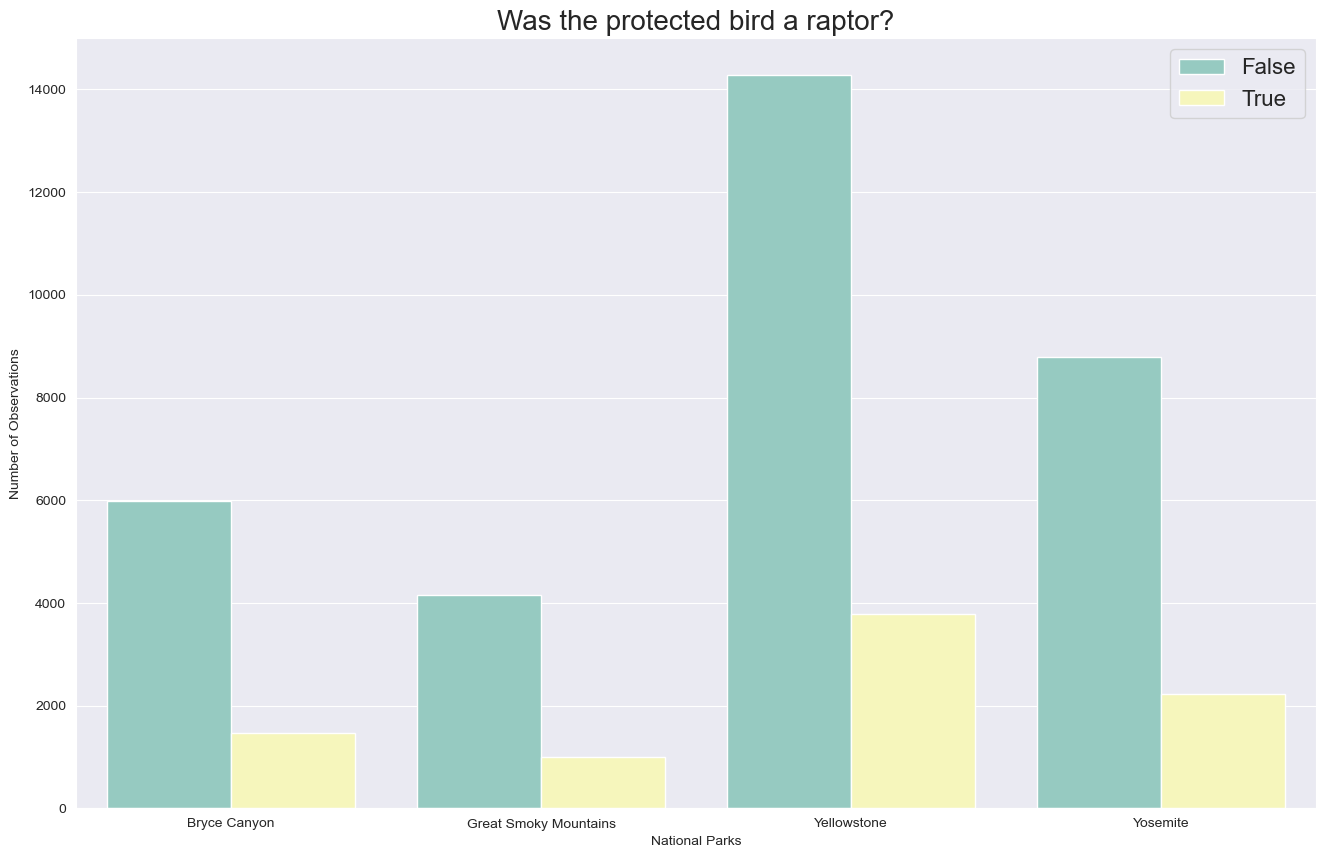

In [53]:
plt.figure(figsize=(16, 10))
data = bird_obs_by_park
sns.barplot(x=data.park_name, y=data.observations , hue=data.is_bird_of_prey, palette='Set3')
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Was the protected bird a raptor?',  fontsize=20)
plt.legend(fontsize=16)
plt.show()

In [54]:
p_bird_obs_by_park = bird_obs_by_park.groupby(['park_name', 'is_bird_of_prey'])\
                            .observations.sum()\
                            .reset_index()\
                            .pivot(columns='is_bird_of_prey',
                                      index='park_name',
                                      values='observations')\
                            .reset_index()
p_bird_obs_by_park.columns = ['park_name', 'not_bird_of_prey', 'bird_of_prey']
# Calculate percentage
percentage_2 = round(p_bird_obs_by_park.bird_of_prey / (p_bird_obs_by_park.bird_of_prey + p_bird_obs_by_park.not_bird_of_prey) * 100, 2)
# add percentage column
p_bird_obs_by_park['percent_prey_birds'] = percentage_2
p_bird_obs_by_park

,park_name,not_bird_of_prey,bird_of_prey,percent_prey_birds
0,Bryce Canyon,5982,1472,19.75
1,Great Smoky Mountains,4157,1002,19.42
2,Yellowstone,14282,3778,20.92
3,Yosemite,8785,2226,20.22


#### Bird of prey sightings make up $\approx 20\%$ of protected bird sightings across the National Parks

----

### We now create some visualisations of species of bird of prey by recorded National Park observation

which have already been seperated into a new Dataframe; `protected_birds_prey_obs`

In [55]:
#pro_prey_obs = protected_birds_prey_obs.drop(columns=['category', 'is_protected'], axis=1, inplace=True)
print(protected_birds_prey_obs.shape)
protected_birds_prey_obs[4:12]

(72, 8)


,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,bird_of_prey
4,Pandion haliaetus,Yosemite,134,Bird,Osprey,Species of Concern,True,Osprey
5,Pandion haliaetus,Great Smoky Mountains,58,Bird,Osprey,Species of Concern,True,Osprey
6,Pandion haliaetus,Bryce Canyon,72,Bird,Osprey,Species of Concern,True,Osprey
7,Pandion haliaetus,Yellowstone,223,Bird,Osprey,Species of Concern,True,Osprey
8,Pandion haliaetus,Yosemite,148,Bird,Osprey,Species of Concern,True,Osprey
9,Pandion haliaetus,Yellowstone,243,Bird,Osprey,Species of Concern,True,Osprey
10,Pandion haliaetus,Bryce Canyon,82,Bird,Osprey,Species of Concern,True,Osprey
11,Pandion haliaetus,Great Smoky Mountains,80,Bird,Osprey,Species of Concern,True,Osprey


The [Western Osprey](https://en.wikipedia.org/wiki/Osprey) `common_name` has repeated observations

- This could be a genuine error, or it could be I needed to reassign the label `Osprey` to one group of sightings.
- We've decided the observations refer to the same bird as the scientific name is the same.
- I will sum the two sets of observation values
- After summation, we would expect 68 rows instead of 72

In [56]:
protected_birds_prey_obs_sorted = protected_birds_prey_obs.groupby(['park_name', 'bird_of_prey',
                                                                    'common_names', 'conservation_status'])['observations'].sum().reset_index()
print(protected_birds_prey_obs_sorted.shape)

(68, 5)


----
Next is to assign a unique colour to each 'type' of `bird of prey` variable

In [57]:
sorted_birds_of_prey = sorted(birds_of_prey)
print(f"We have {len(sorted_birds_of_prey)} birds of prey {sorted_birds_of_prey}")

We have 11 birds of prey ['Buzzard', 'Condor', 'Eagle', 'Falcon', 'Harrier', 'Hawk', 'Kestrel', 'Kite', 'Osprey', 'Owl', 'Vulture']


In [58]:
bird_of_prey_colours = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#bc80bd', '#6a3d9a','#d9d9d9']

The above list was compiled from the html codes from the qualitative colour palette 'Set-3' from [Color Brewer](https://colorbrewer2.org/#type=qualitative&scheme=Set3&n=10)

Now to create a {key: value} dictionary of these colours.

In [59]:
prey_colour = {}
for bird in sorted_birds_of_prey:
    for colour in bird_of_prey_colours:
        prey_colour[bird] = colour
        bird_of_prey_colours.remove(colour)
        break

print(f"The resulting dictionary is: \n{prey_colour}")

The resulting dictionary is: 
{'Buzzard': '#8dd3c7', 'Condor': '#ffffb3', 'Eagle': '#bebada', 'Falcon': '#fb8072', 'Harrier': '#80b1d3', 'Hawk': '#fdb462', 'Kestrel': '#b3de69', 'Kite': '#fccde5', 'Osprey': '#bc80bd', 'Owl': '#6a3d9a', 'Vulture': '#d9d9d9'}


This dictionary can assign {key: value} pairs to the graphs and give a unique colour to each 'type' of `bird_of_prey`

We apply the unique colours by `bird_of_prey` using a lambda function and the `prey_colour` dictionary

In [60]:
colour = protected_birds_prey_obs_sorted['bird_of_prey'].apply(lambda x: prey_colour[x])

----
&nbsp;
Below is an iteration that creates individual `DataFrames` of observations for each park.

In [104]:
# Loop through the parks
d = {}
for park in parks_list:
    d[park] = pd.DataFrame(protected_birds_prey_obs_sorted[protected_birds_prey_obs_sorted['park_name'] == park])
    # Create a new data frame for each park
    # This is a useful variable for creating the visualisations.

# Printing to test
for i in range(0, len(parks_list)):
    print(f"\n{parks_list[i]}:\nShape: {d[parks_list[i]].shape}")


Great Smoky Mountains:
Shape: (17, 5)

Yosemite:
Shape: (17, 5)

Bryce Canyon:
Shape: (17, 5)

Yellowstone:
Shape: (17, 5)


In [105]:
protected_birds_prey_list = protected_birds_prey_obs_sorted.common_names.unique().tolist()
print(f"We have {len(protected_birds_prey_list)} protected birds of prey\
                \n\nWith Common Names:\n\n{protected_birds_prey_list}")

We have 17 protected birds of prey                

With Common Names:

['California Condor', 'Bald Eagle', 'Golden Eagle', 'American Peregrine Falcon', 'Peregrine Falcon', 'Prairie Falcon', 'Northern Harrier', "Cooper's Hawk", 'Red-Shouldered Hawk', 'Rough-Legged Hawk', 'Sharp-Shinned Hawk', 'Swallow-Tailed Kite', 'White-Tailed Kite', 'Osprey', 'Long-Eared Owl', 'Short-Eared Owl', 'Turkey Vulture']


----
&nbsp;
# Visualisation of protected bird of prey sightings by National Park

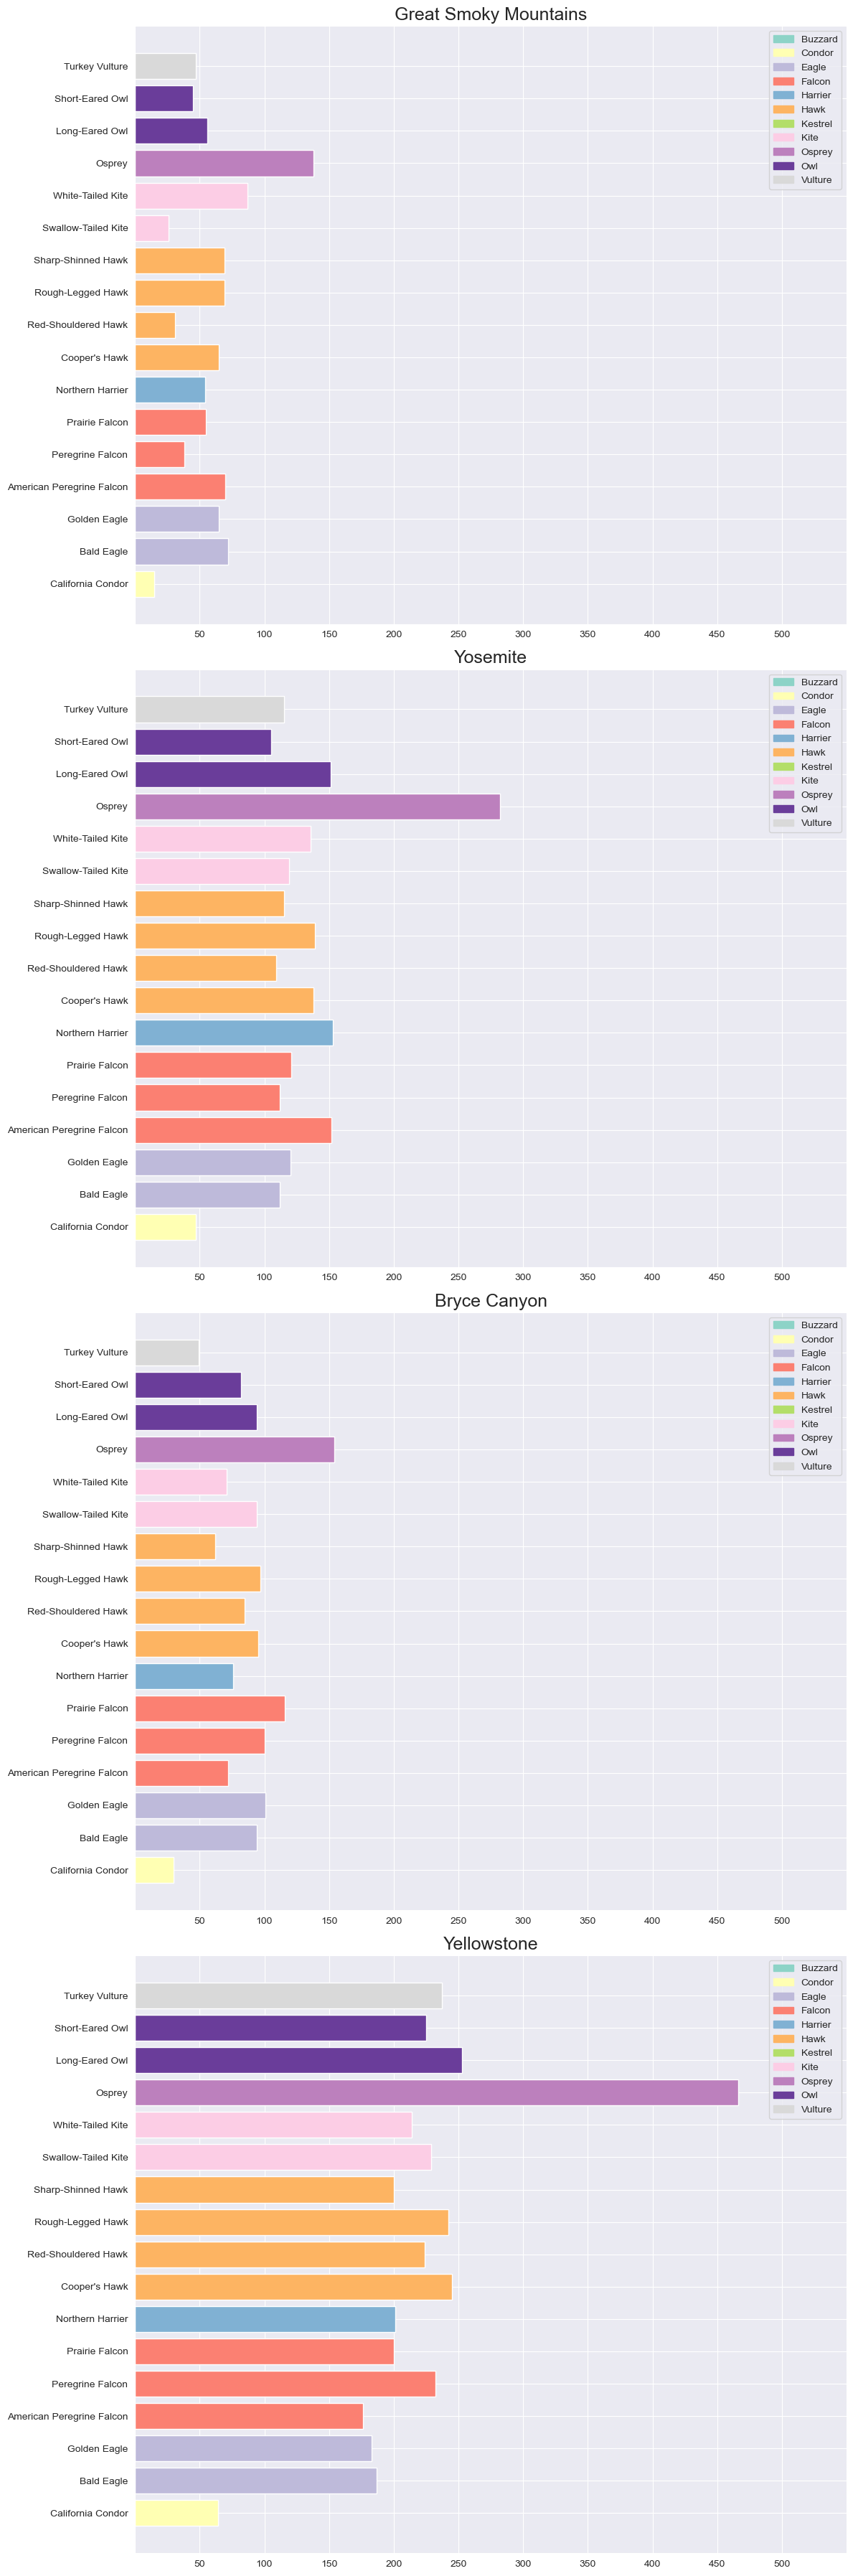

In [106]:
handles = [mpatches.Patch(color=color, label=label) for label, color in prey_colour.items()]
# handles will be added to the plt.legend argument to create a legend from prey_colour dictionary

plt.figure(figsize=(12,36))
for i, park in enumerate(parks_list):
        data = d[park]
        plt.subplot(4,1,(i+1))
        plt.title(park, fontsize=18)
        plt.barh(y=data.common_names, width=data.observations, color=colour)
        plt.legend(handles=handles, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
        plt.xticks(np.arange(50,550,50), fontsize=10)
        plt.xlim(0,550)
        plt.grid(True)

plt.tight_layout()
plt.show()

### `Osprey` is the most widely observed protected bird of prey across the four National Parks.

<img height="633.65" src="Images/Osprey.jpg" width="1400"/>

As can be seen in the above figure, the [Osprey](https://en.wikipedia.org/wiki/Osprey) is a piscivore with fish making up $99\%$ of its diet.
It is one of the most widely distributed raptor species in the world and is found in temperate and tropical regions.

I will populate three lists of each `conservation_status` with the corresponding `common_names` of the protected raptor species

In [64]:
endangered = []
in_recovery = []
species_of_concern = []

data = d[parks_list[0]]

for index, row in data.iterrows():
    if row['conservation_status'] == 'Endangered':
        endangered.append(row['common_names'])
    elif row['conservation_status'] == 'In Recovery':
        in_recovery.append(row['common_names'])
    else:
        species_of_concern.append(row['common_names'])

In [65]:
print(f"There is {len(endangered)} endangered bird of prey species: \n\n{endangered}")

There is 1 endangered bird of prey species: 

['California Condor']


<img height="918" src="Images/California Condor.jpg" width="1400"/>

[Pixabay](https://pixabay.com/photos/california-adult-an-portrait-bird-387357/)

### `California Condor` is the least observed bird of prey in every National Park.
- It is the only endangered bird of prey represented in the data set.
- According to the [U.S. National Parks Service](https://www.nps.gov/articles/000/caco-world-2021.htm) the wild, free flying population total was $334$ birds as of 31/12/2019.

In [66]:
print(f"There are {len(in_recovery)} bird of prey species in recovery: \n\n{in_recovery}")

There are 2 bird of prey species in recovery: 

['Bald Eagle', 'American Peregrine Falcon']


<img height="466.67" src="Images/Bald Eagle 2.jpg" width="1400"/>

[Pixabay](https://pixabay.com/photos/eagle-raptor-birds-of-prey-bird-2776081/)

'Bald Eagle' observations are not significantly different from 'Golden Eagle' observations despite formerly being `Endangered`.
The remaining species are all `Species of Concern`

In [67]:
print(f"There are {len(species_of_concern)} bird of prey species of concern: \n\n{species_of_concern}")

There are 14 bird of prey species of concern: 

['Golden Eagle', 'Peregrine Falcon', 'Prairie Falcon', 'Northern Harrier', "Cooper's Hawk", 'Red-Shouldered Hawk', 'Rough-Legged Hawk', 'Sharp-Shinned Hawk', 'Swallow-Tailed Kite', 'White-Tailed Kite', 'Osprey', 'Long-Eared Owl', 'Short-Eared Owl', 'Turkey Vulture']


----
&nbsp;
Total Number of bird of prey observations across the four National Parks

In [68]:
bird_prey_obs = protected_birds_prey_obs_sorted.groupby('park_name').observations.sum().reset_index()
bird_prey_obs

,park_name,observations
0,Bryce Canyon,1472
1,Great Smoky Mountains,1002
2,Yellowstone,3778
3,Yosemite,2226


In [69]:
total = bird_prey_obs.observations.sum()
print(f"Total number of bird of prey observations: {total}")

Total number of bird of prey observations: 8478


In [70]:
print(f"Total number of observations, every category, every park: {obs_data.observations.sum()}")

Total number of observations, every category, every park: 3314739


## $\approx 0.26 \%$ of observations in `observations.csv` were of protected birds of prey

In [71]:
percentage_bird_prey = round((bird_prey_obs.observations.sum() / obs_data.observations.sum()) * 100, 2)
print(f"Of the observations across all National Parks, {percentage_bird_prey} % were bird of prey observations")

Of the observations across all National Parks, 0.26 % were bird of prey observations




----

# Non-protected bird species
&nbsp;
## Where `conservation_status` $=$ `Least Concern`


We first find any repeated `common_names` in `non_protected_birds`

In [72]:
print(repeated_different_birds_list)

['Osprey', 'Brant', 'Chukar', 'Common Loon', 'Fox Sparrow', 'Common Redpoll', 'Bank Swallow', 'Gray Catbird', 'Blue-Gray Gnatcatcher', 'Blue-Headed Vireo', 'Eurasian Collared Dove', 'Black-Billed Magpie', 'Gray Flycatcher', 'Great Gray Owl', 'Barn Owl']


In [73]:
non_protected_birds = (species_data[(species_data.category == 'Bird')
                                & (species_data.conservation_status == 'Least Concern')])
print(f'\nThere are {non_protected_birds.shape} non-protected bird species\n')

non_protected_birds_prey = non_protected_birds[non_protected_birds['bird_of_prey'].map(lambda x: len(x)) > 0]
non_protected_birds_prey_list = non_protected_birds_prey.common_names.tolist()
print(f"We have {len(non_protected_birds_prey_list)} non-protected birds of prey with common names:"
      f"\n\n{non_protected_birds_prey_list}")
print(non_protected_birds_prey.shape)


There are (442, 6) non-protected bird species

We have 34 non-protected birds of prey with common names:

['Northern Goshawk', 'Red-Tailed Hawk', 'Broad-Winged Hawk', 'Mississippi Kite', 'Black Vulture', 'Common Nighthawk', 'Lesser Yellowlegs', 'Greater Yellowlegs', 'American Kestrel', 'Eastern Meadowlark', 'Saw-Whet Owls', 'Northern Saw-Whet Owl', 'Great Horned Owl', 'Eastern Screech Owl, Eastern Screech-Owl', 'Eastern Screech-Owl', 'Barred Owl', 'Barn Owl, Common Barn-Owl', 'Barn-Owls', 'Ferruginous Hawk', "Swainson's Hawk", 'Western Meadowlark', 'Flammulated Owl', 'Boreal Owl', 'Burrowing Owl', 'Snowy Owl', 'Mountain Pygmy Owl, Northern Pygmy-Owl', 'Eastern Screech-Owl', 'Western Screech-Owl', 'Great Gray Owl, Great Grey Owl', 'Northern Pygmy Owl', 'Flammulated Owl', 'Great Gray Owl', 'Spotted Owl', 'Barn Owl']
(34, 6)


In [74]:
repeated_different_np_birds_list = []

for bird in non_protected_birds_prey_list:
  if bird in repeated_different_birds_list:
    repeated_different_np_birds_list.append(bird)

print(f"{len(repeated_different_np_birds_list)} birds have more than one unique name\n")
print(repeated_different_np_birds_list)

2 birds have more than one unique name

['Great Gray Owl', 'Barn Owl']


### Analysing `Great Grey Owl` in `species_data`

In [75]:
species_data['is_great_grey'] = species_data.common_names.str.contains(r"\bGreat Gray Owl\b", regex=True)
species_data[species_data.is_great_grey]

,category,scientific_name,common_names,conservation_status,is_protected,bird_of_prey,is_great_grey
3254,Bird,Strix nebulosa,"Great Gray Owl, Great Grey Owl",Least Concern,False,Owl. Owl,True
4573,Bird,Strix nebulosa,Great Gray Owl,Least Concern,False,Owl,True


We remove repeated reference to `Great Grey Owl` where index [3254] and [4573] share all characteristics except `common_names`

In [76]:
species_data.drop([3254], axis=0, inplace=True)
species_data[species_data.is_great_grey]

,category,scientific_name,common_names,conservation_status,is_protected,bird_of_prey,is_great_grey
4573,Bird,Strix nebulosa,Great Gray Owl,Least Concern,False,Owl,True


### Analysing `Barn Owl` in `species_data`

In [77]:
species_data['is_barn_owl'] = species_data.common_names.str.contains(r"\bBarn\b", regex=True)
species_data[species_data.is_barn_owl]

,category,scientific_name,common_names,conservation_status,is_protected,bird_of_prey,is_great_grey,is_barn_owl
223,Bird,Hirundo rustica,Barn Swallow,Least Concern,False,,False,True
358,Bird,Tyto alba,"Barn Owl, Common Barn-Owl",Least Concern,False,Owl. Owl,False,True
359,Bird,Tytonidae,Barn-Owls,Least Concern,False,Owl,False,True
4575,Bird,Tyto alba,Barn Owl,Least Concern,False,Owl,False,True


- We remove repeated reference to `Barn Owl` where index [358] and [4575] share all characteristics except `common_names`.

- We rename index[358] `Common Barn Owl` and rename index[359] `Barn Owl` as the `scientific_name` is different.

In [78]:
species_data.drop([4575], axis=0, inplace=True)
species_data['common_names'].replace({'Barn Owl, Common Barn-Owl':'Common Barn Owl',
                                      'Barn-Owls':'Barn Owl',
                                      },inplace=True)

### Analysing `Screech Owls` in `species_data`

In [79]:
species_data['is_screech_owl'] = species_data.common_names.str.contains(r"\bScreech\b", regex=True)
species_data[species_data.is_screech_owl]

,category,scientific_name,common_names,conservation_status,is_protected,bird_of_prey,is_great_grey,is_barn_owl,is_screech_owl
355,Bird,Megascops asio,"Eastern Screech Owl, Eastern Screech-Owl",Least Concern,False,Owl. Owl,False,False,True
356,Bird,Otus asio,Eastern Screech-Owl,Least Concern,False,Owl,False,False,True
3252,Bird,Megascops asio,Eastern Screech-Owl,Least Concern,False,Owl,False,False,True
3253,Bird,Megascops kennicottii,Western Screech-Owl,Least Concern,False,Owl,False,False,True


The Genera *Otus* and *Megascops* were merged in the 20th century. Indexes [356] and [3252] both refer to the [Eastern Screech-Owl](https://en.wikipedia.org/wiki/Screech_owl)
Therefore, we drop the repeated `common_name`, index [355] from `species_data`

In [80]:
species_data.drop([355], axis=0, inplace=True)

Finally, we drop the boolean comparison columns from `species_data`

In [81]:
species_data.drop(columns=['is_great_grey', 'is_barn_owl', 'is_screech_owl'], axis=1, inplace=True)
species_data.head()

,category,scientific_name,common_names,conservation_status,is_protected,bird_of_prey
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern,False,
1,Mammal,Bos bison,"American Bison, Bison",Least Concern,False,
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Least Concern,False,
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Least Concern,False,
4,Mammal,Cervus elaphus,Wapiti Or Elk,Least Concern,False,


The above deletions were preformed on `species_data`. We now redefine the `non_protected_birds` DataFrame.

In [82]:
non_protected_birds = (species_data[(species_data.category == 'Bird')
                                & (species_data.conservation_status == 'Least Concern')])
print(f'\nThere are {non_protected_birds.shape} non-protected bird species\n')

non_protected_birds_prey = non_protected_birds[non_protected_birds['bird_of_prey'].map(lambda x: len(x)) > 0]
non_protected_birds_prey_list = non_protected_birds_prey.common_names.tolist()
print(f"We have {len(non_protected_birds_prey_list)} non-protected birds of prey with common names:"
      f"\n\n{non_protected_birds_prey_list}")
print(non_protected_birds_prey.shape)


There are (439, 6) non-protected bird species

We have 31 non-protected birds of prey with common names:

['Northern Goshawk', 'Red-Tailed Hawk', 'Broad-Winged Hawk', 'Mississippi Kite', 'Black Vulture', 'Common Nighthawk', 'Lesser Yellowlegs', 'Greater Yellowlegs', 'American Kestrel', 'Eastern Meadowlark', 'Saw-Whet Owls', 'Northern Saw-Whet Owl', 'Great Horned Owl', 'Eastern Screech-Owl', 'Barred Owl', 'Common Barn Owl', 'Barn Owl', 'Ferruginous Hawk', "Swainson's Hawk", 'Western Meadowlark', 'Flammulated Owl', 'Boreal Owl', 'Burrowing Owl', 'Snowy Owl', 'Mountain Pygmy Owl, Northern Pygmy-Owl', 'Eastern Screech-Owl', 'Western Screech-Owl', 'Northern Pygmy Owl', 'Flammulated Owl', 'Great Gray Owl', 'Spotted Owl']
(31, 6)


#### By inspection we can see some false positives. `Meadowlark`, `Yellowlegs` etc

- If the `bird_of_prey` value is lower case, it will be removed from `non_protected_birds_prey`

- The [Common Nighthawk](https://en.wikipedia.org/wiki/Common_nighthawk) feeds on crepuscular (nocturnal), flying insects and is therefore not a bird of prey

We also notice,

- repeated `common_names` 'Mountain Pygmy Owl, Northern Pygmy-Owl'

- 'Flammulated Owl' appears twice in the list

- Unnecessary pluralisation of `Saw-Whet Owls`

We perform operations to solve these problems on `non_protected_birds`


In [83]:
# We save all rows where first character is upper case or empty string
non_protected_birds = non_protected_birds[non_protected_birds['bird_of_prey'].str.contains('^[A-Z]+|^$')]

non_protected_birds['common_names'].replace({'Saw-Whet Owls': 'Saw-Whet Owl'},inplace=True)
non_protected_birds['bird_of_prey'].replace({'Owl. Owl':'Owl'},inplace=True)

non_protected_birds_prey = non_protected_birds[non_protected_birds['bird_of_prey'].map(lambda x: len(x)) > 0]
non_protected_birds_prey_list = non_protected_birds_prey.common_names.tolist()
print(f"We have {len(non_protected_birds_prey_list)} non-protected birds of prey with common names:"
      f"\n\n{non_protected_birds_prey_list}")
print(non_protected_birds_prey.shape)

We have 25 non-protected birds of prey with common names:

['Red-Tailed Hawk', 'Broad-Winged Hawk', 'Mississippi Kite', 'Black Vulture', 'American Kestrel', 'Saw-Whet Owl', 'Northern Saw-Whet Owl', 'Great Horned Owl', 'Eastern Screech-Owl', 'Barred Owl', 'Common Barn Owl', 'Barn Owl', 'Ferruginous Hawk', "Swainson's Hawk", 'Flammulated Owl', 'Boreal Owl', 'Burrowing Owl', 'Snowy Owl', 'Mountain Pygmy Owl, Northern Pygmy-Owl', 'Eastern Screech-Owl', 'Western Screech-Owl', 'Northern Pygmy Owl', 'Flammulated Owl', 'Great Gray Owl', 'Spotted Owl']
(25, 6)


### Analysing Pygmy Owls in `non_protected_birds`

In [84]:
non_protected_birds['is_pygmy'] = non_protected_birds.common_names.str.contains(r"\bPygmy\b", regex=True)
non_protected_birds[non_protected_birds.is_pygmy]

,category,scientific_name,common_names,conservation_status,is_protected,bird_of_prey,is_pygmy
3216,Bird,Sitta pygmaea,Pygmy Nuthatch,Least Concern,False,,True
3251,Bird,Glaucidium gnoma,"Mountain Pygmy Owl, Northern Pygmy-Owl",Least Concern,False,Owl,True
4571,Bird,Glaucidium gnoma,Northern Pygmy Owl,Least Concern,False,Owl,True


We have the scientific name *Glaucidium gnoma* for both the `Mountain Pygmy Owl` and the `Northern Pygmy Owl`.

- The [Northern Pygmy Owl](https://en.wikipedia.org/wiki/Northern_pygmy_owl) has the `scientific_name` *Glaucidium californicum*

- *Glaucidium gnoma* is the [Mountain Pygmy Owl](https://en.wikipedia.org/wiki/Mountain_pygmy_owl)

In [85]:
non_protected_birds['is_glaucidium'] = non_protected_birds.scientific_name.str.contains(r"\bGlaucidium\b", regex=True)
non_protected_birds[non_protected_birds.is_glaucidium]

,category,scientific_name,common_names,conservation_status,is_protected,bird_of_prey,is_pygmy,is_glaucidium
3251,Bird,Glaucidium gnoma,"Mountain Pygmy Owl, Northern Pygmy-Owl",Least Concern,False,Owl,True,True
4571,Bird,Glaucidium gnoma,Northern Pygmy Owl,Least Concern,False,Owl,True,True


*Glaucidium californicum* $\notin$ `species_data` and will therefore not be present in `obs_data.csv` as the scientific names exactly match.

In [86]:
non_protected_birds.drop([3251], axis=0, inplace=True)
non_protected_birds[non_protected_birds.is_glaucidium]

,category,scientific_name,common_names,conservation_status,is_protected,bird_of_prey,is_pygmy,is_glaucidium
4571,Bird,Glaucidium gnoma,Northern Pygmy Owl,Least Concern,False,Owl,True,True


### Analysing Flammulated Owls in `non_protected_birds`

In [87]:
non_protected_birds['is_flammulated'] = non_protected_birds.common_names.str.contains(r"\bFlammulated\b", regex=True)
non_protected_birds[non_protected_birds.is_flammulated]

,category,scientific_name,common_names,conservation_status,is_protected,bird_of_prey,is_pygmy,is_glaucidium,is_flammulated
3247,Bird,Psiloscops flammeolus,Flammulated Owl,Least Concern,False,Owl,False,False,True
4572,Bird,Otus flammeolus,Flammulated Owl,Least Concern,False,Owl,False,False,True


The Flammulated owl belongs to the Genus *Psiloscops* whereas *Otus* is the old Screech Owl genus as we saw above.
We drop index [4572]

In [88]:
non_protected_birds.drop([4572], axis=0, inplace=True)
non_protected_birds[non_protected_birds.is_flammulated]

,category,scientific_name,common_names,conservation_status,is_protected,bird_of_prey,is_pygmy,is_glaucidium,is_flammulated
3247,Bird,Psiloscops flammeolus,Flammulated Owl,Least Concern,False,Owl,False,False,True


In [89]:
non_protected_birds.drop(columns=['is_pygmy', 'is_glaucidium', 'is_flammulated'], axis=1, inplace=True)
non_protected_birds_prey = non_protected_birds[non_protected_birds['bird_of_prey'].map(lambda x: len(x)) > 0]
non_protected_birds_prey_list = non_protected_birds_prey.common_names.tolist()
print(f"We have {len(non_protected_birds_prey_list)} non-protected birds of prey with common names:"
      f"\n\n{non_protected_birds_prey_list}")
print(non_protected_birds_prey.shape)

We have 23 non-protected birds of prey with common names:

['Red-Tailed Hawk', 'Broad-Winged Hawk', 'Mississippi Kite', 'Black Vulture', 'American Kestrel', 'Saw-Whet Owl', 'Northern Saw-Whet Owl', 'Great Horned Owl', 'Eastern Screech-Owl', 'Barred Owl', 'Common Barn Owl', 'Barn Owl', 'Ferruginous Hawk', "Swainson's Hawk", 'Flammulated Owl', 'Boreal Owl', 'Burrowing Owl', 'Snowy Owl', 'Eastern Screech-Owl', 'Western Screech-Owl', 'Northern Pygmy Owl', 'Great Gray Owl', 'Spotted Owl']
(23, 6)


----
&nbsp;
## Dataframe Merge

`non_protected_birds` will be merged with `obs_data` to create a Dataframe `non_protected_birds_obs` with observations of non-protected birds across the four national parks

----

In [90]:
obs_data.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains,68
1,Neovison vison,Great Smoky Mountains,77
2,Prunus subcordata,Yosemite,138
3,Abutilon theophrasti,Bryce Canyon,84
4,Githopsis specularioides,Great Smoky Mountains,85


In [91]:
non_protected_birds.head()

,category,scientific_name,common_names,conservation_status,is_protected,bird_of_prey
90,Bird,Vermivora pinus X chrysoptera,Brewster's Warbler,Least Concern,False,
95,Bird,Buteo jamaicensis,Red-Tailed Hawk,Least Concern,False,Hawk
97,Bird,Buteo platypterus,Broad-Winged Hawk,Least Concern,False,Hawk
101,Bird,Ictinia mississippiensis,Mississippi Kite,Least Concern,False,Kite
103,Bird,Coragyps atratus,Black Vulture,Least Concern,False,Vulture


### We use an inner merge to retain as much data as possible

In [92]:
# Replace empty strings in bird_of_prey with a placeholder value
non_protected_birds.loc[non_protected_birds['bird_of_prey'] == '', 'bird_of_prey'] = '_PLACEHOLDER_'

# inner merge to retain all data
non_protected_birds_obs = pd.merge(obs_data, non_protected_birds, how='inner')

# Replace the placeholder value with empty strings
non_protected_birds_obs.loc[non_protected_birds_obs['bird_of_prey'] == '_PLACEHOLDER_', 'bird_of_prey'] = ''
print(f"\nwith shape: {non_protected_birds_obs.shape}")
non_protected_birds_obs.head(10)


with shape: (1956, 8)


,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,bird_of_prey
0,Spizella pusilla,Yellowstone,228,Bird,Field Sparrow,Least Concern,False,
1,Spizella pusilla,Yosemite,148,Bird,Field Sparrow,Least Concern,False,
2,Spizella pusilla,Bryce Canyon,92,Bird,Field Sparrow,Least Concern,False,
3,Spizella pusilla,Great Smoky Mountains,72,Bird,Field Sparrow,Least Concern,False,
4,Cistothorus platensis,Bryce Canyon,114,Bird,Sedge Wren,Least Concern,False,
5,Cistothorus platensis,Great Smoky Mountains,65,Bird,Sedge Wren,Least Concern,False,
6,Cistothorus platensis,Yellowstone,266,Bird,Sedge Wren,Least Concern,False,
7,Cistothorus platensis,Yosemite,186,Bird,Sedge Wren,Least Concern,False,
8,Larus philadelphia,Yosemite,167,Bird,Bonaparte's Gull,Least Concern,False,
9,Larus philadelphia,Great Smoky Mountains,61,Bird,Bonaparte's Gull,Least Concern,False,


We haven't performed careful enough analysis on the non-protected birds. $1956\neq4\times434$
As a quick fix we drop duplicates of `scientific_name` and `observations`

In [93]:
non_protected_birds_obs.drop_duplicates(subset=["scientific_name", "observations"], keep=False, inplace=True)

In [94]:
non_protected_birds_prey_obs = non_protected_birds_obs[non_protected_birds_obs['bird_of_prey'].map(lambda x: len(x)) > 0]

In [95]:
non_protected_birds_prey_list = non_protected_birds_prey_obs.common_names.unique().tolist()
print(f"We have {len(non_protected_birds_prey_list)} non-protected birds of prey\
                \n\nWith Common Names:\n\n{non_protected_birds_prey_list}")

We have 22 non-protected birds of prey                

With Common Names:

['Barn Owl', 'Black Vulture', 'Common Barn Owl', 'Saw-Whet Owl', 'Mississippi Kite', 'Boreal Owl', 'Great Horned Owl', 'Ferruginous Hawk', 'Flammulated Owl', 'Northern Pygmy Owl', 'Red-Tailed Hawk', 'Great Gray Owl', 'Eastern Screech-Owl', 'Western Screech-Owl', 'Snowy Owl', "Swainson's Hawk", 'Northern Saw-Whet Owl', 'Broad-Winged Hawk', 'Spotted Owl', 'Barred Owl', 'Burrowing Owl', 'American Kestrel']


----
&nbsp;
### We will plot visualisations of the distribution of non-protected bird of prey species in a similar way to the protected species

In [96]:
non_protected_birds_obs['is_bird_of_prey'] = protected_birds_obs.bird_of_prey != ''
nonp_bird_obs_by_park = non_protected_birds_obs.groupby(['park_name', 'is_bird_of_prey']).observations.sum().reset_index()
nonp_bird_obs_by_park

,park_name,is_bird_of_prey,observations
0,Bryce Canyon,False,4444
1,Bryce Canyon,True,1256
2,Great Smoky Mountains,False,3314
3,Great Smoky Mountains,True,961
4,Yellowstone,False,11278
5,Yellowstone,True,3013
6,Yosemite,False,6426
7,Yosemite,True,1958


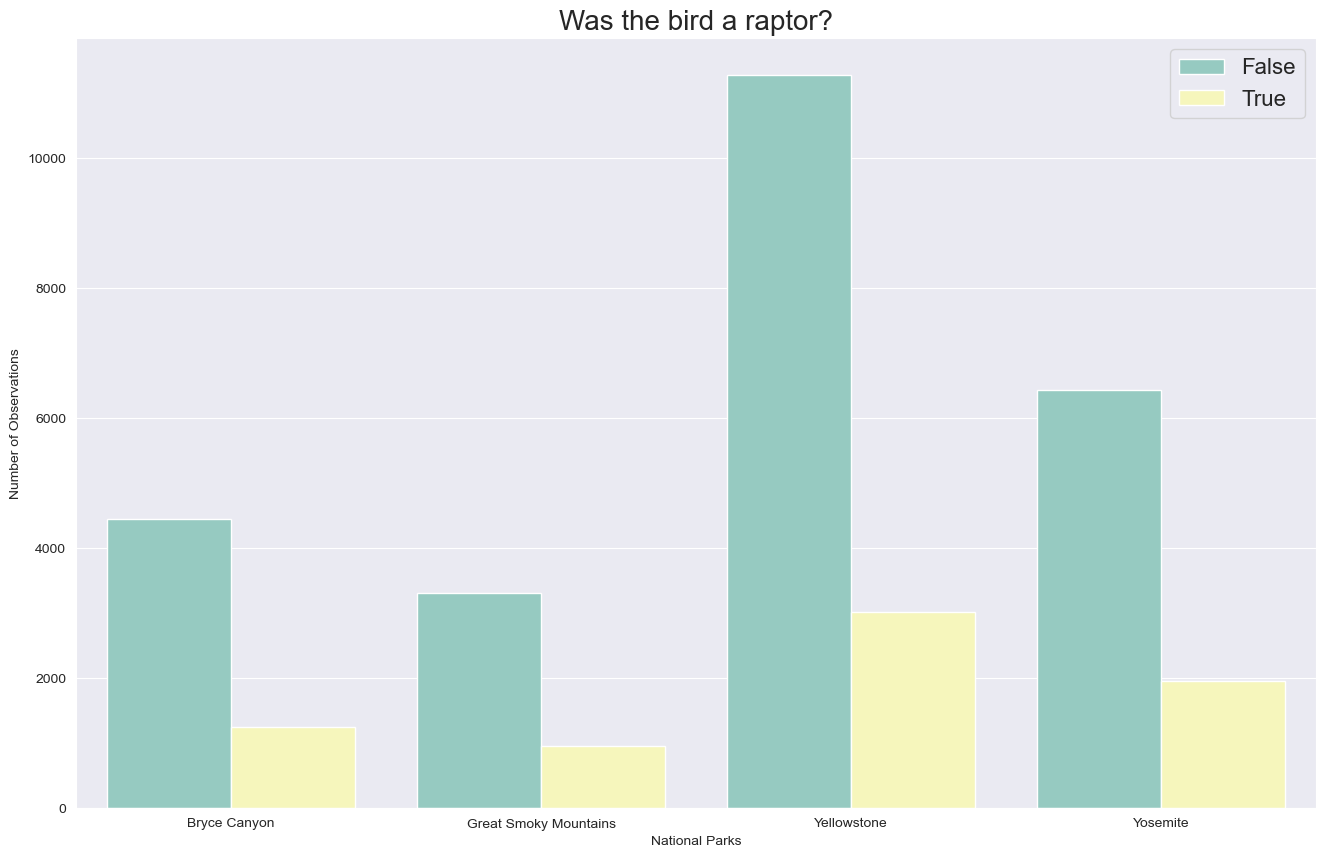

In [97]:
plt.figure(figsize=(16, 10))
data = nonp_bird_obs_by_park
sns.barplot(x=data.park_name, y=data.observations , hue=data.is_bird_of_prey, palette='Set3')
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Was the bird a raptor?',  fontsize=20)
plt.legend(fontsize=16)
plt.show()

In [98]:
nonp_bird_counts = nonp_bird_obs_by_park.groupby(['park_name', 'is_bird_of_prey'])\
                            .observations.sum()\
                            .reset_index()\
                            .pivot(columns='is_bird_of_prey',
                                      index='park_name',
                                      values='observations')\
                            .reset_index()
nonp_bird_counts.columns = ['park_name', 'not_bird_of_prey', 'bird_of_prey']

nonp_bird_counts

,park_name,not_bird_of_prey,bird_of_prey
0,Bryce Canyon,4444,1256
1,Great Smoky Mountains,3314,961
2,Yellowstone,11278,3013
3,Yosemite,6426,1958


We now calculate the proportion of bird of prey observations.

In [99]:
percentage_3 = round(nonp_bird_counts.bird_of_prey / (nonp_bird_counts.bird_of_prey + nonp_bird_counts.not_bird_of_prey) * 100, 2)

nonp_bird_counts['percent_non_protected'] = percentage_3
nonp_bird_counts

,park_name,not_bird_of_prey,bird_of_prey,percent_non_protected
0,Bryce Canyon,4444,1256,22.04
1,Great Smoky Mountains,3314,961,22.48
2,Yellowstone,11278,3013,21.08
3,Yosemite,6426,1958,23.35


#### Birds of prey make up $\approx 22\%$ of non-protected bird observations

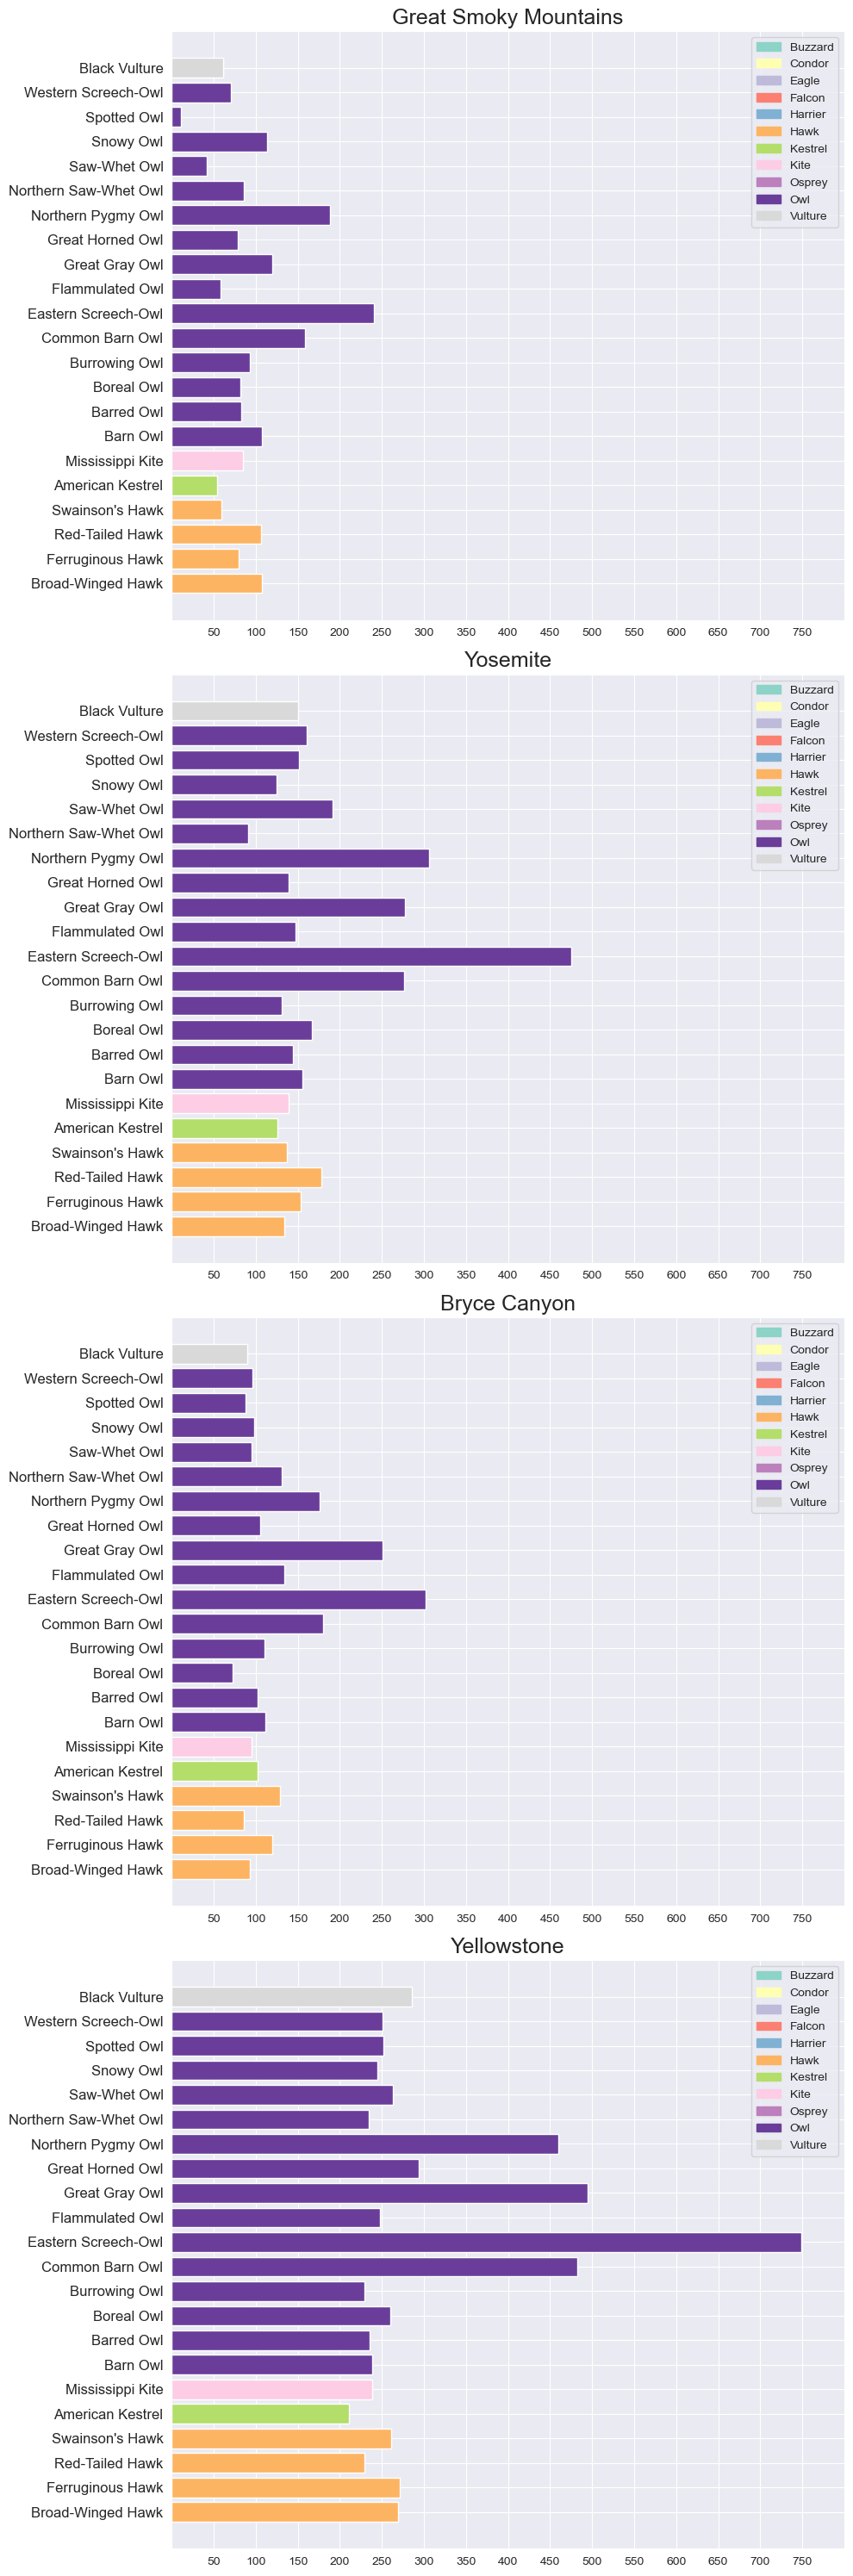

In [103]:
non_protected_birds_prey_obs_sorted = non_protected_birds_prey_obs.groupby(['park_name', 'bird_of_prey', 'common_names'])['observations'].sum().reset_index()

a = non_protected_birds_prey_obs_sorted['bird_of_prey'].apply(lambda x: prey_colour[x])

# Loop through the parks
e = {}
for park in parks_list:
    e[park] = pd.DataFrame(non_protected_birds_prey_obs_sorted[non_protected_birds_prey_obs_sorted['park_name'] == park])
    # Creating a new data frame for each park

plt.figure(figsize=(10,30))
for i, park in enumerate(parks_list):
        data = e[park]
        plt.subplot(4,1,(i+1))
        plt.title(park, fontsize=18)
        plt.barh(y=data.common_names, width=data.observations, color=a)
        plt.legend(handles=handles, fontsize=10)
        plt.yticks(rotation=0, fontsize=12)
        plt.xticks(np.arange(50,800,50), fontsize=10)
        plt.xlim(0,800)
        plt.grid(True)

plt.tight_layout()
plt.show()

----

### In `Yosemite` & `Great Smoky Mountains`, the most commonly observed non-protected birds of prey were;
- 1 - `Eastern Screech Owl`
- 2 - `Northern Pygmy Owl`

There was no clear third place


<img height="506" src="Images/Screech:Pygmy.jpg" width="1600"/>

Left is the [Eastern Screech Owl](https://pixabay.com/photos/eastern-screech-owl-owl-perched-3526934/). Right is the [Northern Pygmy Owl](https://pixabay.com/photos/eurasian-pygmy-owl-5043832/)

### In `Bryce Canyon` & `Yellowstone`;
- 1 - `Eastern Screech Owl`
- 2 - `Great Grey Owl`

Again, there was no clear third place.

<img height="933" src="Images/Great Grey Owl.jpg" width="1400"/>

The [Great Grey Owl](https://pixabay.com/photos/great-grey-owl-bird-owl-animal-7180882/)

----
&nbsp;
The total number of non-protected bird of prey observations across the four National Parks

In [1782]:
nonp_bird_prey_obs = non_protected_birds_prey_obs_sorted.groupby('park_name').observations.sum().reset_index()
nonp_bird_prey_obs

,park_name,observations
0,Bryce Canyon,2767
1,Great Smoky Mountains,2085
2,Yellowstone,6701
3,Yosemite,3954


In [1783]:
total_nonp = nonp_bird_prey_obs.observations.sum()
print(f"Total number of non-protected bird of prey observations: {total_nonp}")

Total number of non-protected bird of prey observations: 15507


## $\approx 0.47 \%$ of observations in `observations.csv` were of non-protected birds of prey

In [1784]:
percentage_bird_prey = round((total_nonp / obs_data.observations.sum()) * 100, 2)
print(f"Of the observations across all National Parks, {percentage_bird_prey} % were non-protected bird of prey observations")

Of the observations across all National Parks, 0.47 % were non-protected bird of prey observations


----
&nbsp;
# Conclusion.


----
### Observations of interest from the data;

- Approximately as many non-protected bird of prey observations were made in comparison to protected bird of prey.

- Of all observations, $\approx 0.75 \%$ were birds of prey. One quarter of these observations were protected species

- The California Condor is the only critically endangered bird of prey species in the dataset.

- Of the birds of prey categorised `Least Concern`, there are 14 different species of owl.

- Of the protected birds of prey the greatest aggregate was 4 different species of hawk.

- The Osprey was the most observed protected bird of prey.

----

#### [Owls](https://en.wikipedia.org/wiki/Owl) are mostly nocturnal. Their relative diversity could give an indication as to how human activities affect the populations of birds of prey.

----
## California Condors

The California Condor is critically endangered and during the 1980's the population dwindled to just a few dozen birds.
This was mainly due to;

- Destruction of the birds' native habitat, including old-growth forests and roosting sites.
- Lead poisoning from hunting activities.
- The widespread use of the pesticide [DDT](https://www.cdc.gov/biomonitoring/DDT_FactSheet.html) which causes eggshell thinning.
- Human activities such as direct killing and power line collisions

Conservation efforts, including captive breeding and release programs, have helped increase the population. However, the species is still at risk and considered one of the most endangered bird species in the world.

Below is a visualisation of Condor numbers in captivity and in the wild between 2000 and 2019. The data is from the [National Parks Service](https://www.nps.gov/subjects/condors/understandingcondors.htm)

In [1785]:
condors = pd.read_csv('condors.csv')
condors.head()

,year,wild,captive
0,2000,50,128
1,2001,58,129
2,2002,81,130
3,2003,84,131
4,2004,96,132


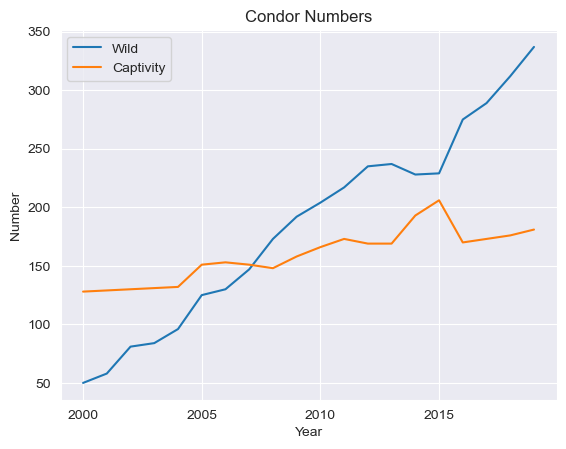

<Figure size 640x480 with 0 Axes>

In [1786]:
# Plot the data as lines
plt.plot('year', 'wild', data=condors, label='Wild')
plt.plot('year', 'captive', data=condors, label='Captivity')
plt.xlabel('Year')
plt.xticks(range(2000, 2020, 5), range(2000, 2020, 5))
plt.ylabel('Number')
plt.title('Condor Numbers')
plt.legend()
plt.show()
plt.clf()

#### The number of wild, free flying condors has been steadily increasing since 2000.
However, this is still a very small population, primarily in California and Arizona. There are a few captive condors in Mexico.

In [1787]:
condor_df = protected_birds_prey_obs[protected_birds_prey_obs['common_names'] == 'California Condor']
condor_obs = condor_df.groupby(['park_name'])['observations'].sum()
condor_obs

park_name
Bryce Canyon             30
Great Smoky Mountains    15
Yellowstone              64
Yosemite                 47
Name: observations, dtype: int64

There could not have been 15 Condor observations over 1 week in the Great Smoky Mountains!

----
The above analysis of Condor numbers shows the dataset of observations was fictional. This could also be seen in how normally distributed the observations were. The real world does not behave so conveniently.

It would be misguided to form any real world conclusions based on the insights of the above analysis.
However, I believe the analytical techniques I developed could easily be transferred to another dataset.

For example, this dataset from the [U.S. National Parks Service](https://www.kaggle.com/datasets/nationalparkservice/park-biodiversity?select=species.csv) on Kaggle

As an open-ended exploratory data analysis project, I'm happy with how I was able to organically form this exploration into North American birds of prey.

----
## Criticisms

- When isolating birds of prey from other birds in the dataset, I manually created a list of types of raptor. If my list is not exhaustive, there's a good chance I may miss birds of prey in large datasets.

- For larger datasets, I will need to create more efficient filtering algorithms.


----